- change classification rules

# Abstraction and Reasoning Starter Notebook

This notebook will get you started on on the basics of this competition

In [1]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

/kaggle/input
/kaggle/input/abstraction-and-reasoning-challenge
/kaggle/input/abstraction-and-reasoning-challenge/training
/kaggle/input/abstraction-and-reasoning-challenge/evaluation
/kaggle/input/abstraction-and-reasoning-challenge/test


I like to use the `Path` class for my paths.

In [3]:
from pathlib import Path

data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'

The `training` folder has 400 JSON tasks. The names of the first three are shown below.

In [4]:
training_tasks = sorted(os.listdir(training_path))
print(training_tasks[:3])

['007bbfb7.json', '00d62c1b.json', '017c7c7b.json']


In each task, there are two dictionary keys, `train` and `test`. You learn the pattern from the train input-output pairs, and then apply the pattern to the `test` input, to predict an output.

In [5]:
task_file = str(training_path / '00d62c1b.json')

with open(task_file, 'r') as f:
    task = json.load(f)

print(task.keys())

dict_keys(['train', 'test'])


Tasks have multiple `train` input-output pairs. Most tasks have a single `test` input-output pair, although some have more than one.

In [6]:
n_train_pairs = len(task['train'])
n_test_pairs = len(task['test'])

print(f'task contains {n_train_pairs} training pairs')
print(f'task contains {n_test_pairs} test pairs')

task contains 5 training pairs
task contains 1 test pairs


Drilling into the first `train` input-output pair, we can see the grids are expressed as 2d lists with integers 0-9.

In [7]:
sum(sum(np.array(task['train'][0]['input'])))

18

In [8]:
display(task['train'][0]['input'])
display(task['train'][0]['output'])

[[0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0],
 [0, 3, 0, 3, 0, 0],
 [0, 0, 3, 0, 3, 0],
 [0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0]]

[[0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0],
 [0, 3, 4, 3, 0, 0],
 [0, 0, 3, 4, 3, 0],
 [0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0]]

## Function to plot the first train/test input/output pairs of a task

You can use this function to plot the first `train` and `test` grids. The color aligns with what is found on the ARC app. Note though, the ARC app presents the grids to scale, where these display the grids in the same size, regardless of their dimension.

In [9]:
def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    fig, axs = plt.subplots(1, 4, figsize=(15,15))
    axs[0].imshow(task['train'][0]['input'], cmap=cmap, norm=norm)
    axs[0].axis('off')
    axs[0].set_title('Train Input')
    axs[1].imshow(task['train'][0]['output'], cmap=cmap, norm=norm)
    axs[1].axis('off')
    axs[1].set_title('Train Output')
    axs[2].imshow(task['test'][0]['input'], cmap=cmap, norm=norm)
    axs[2].axis('off')
    axs[2].set_title('Test Input')
    axs[3].imshow(task['test'][0]['output'], cmap=cmap, norm=norm)
    axs[3].axis('off')
    axs[3].set_title('Test Output')
    plt.tight_layout()
    plt.show()

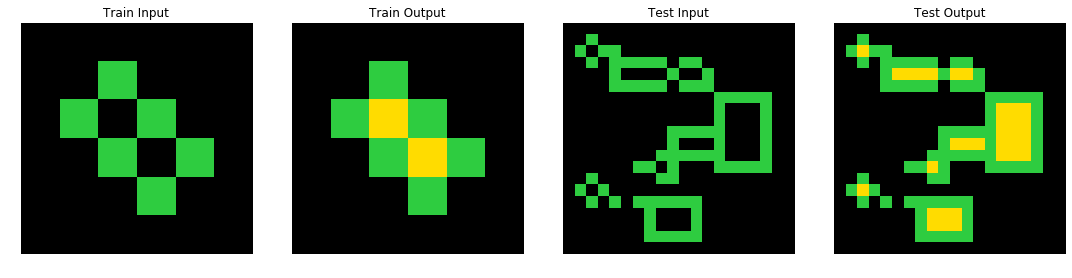

In [10]:
plot_task(task)

# evaluation data

In [11]:
evaluation_tasks = sorted(os.listdir(evaluation_path))
print(evaluation_tasks[:3])
print(len(evaluation_tasks))

evaluation_task_file = str(evaluation_path / '00576224.json')

with open(evaluation_task_file, 'r') as f:
    evaluation_task = json.load(f)
print(evaluation_task.keys())
print(len(evaluation_task["train"]))
print(len(evaluation_task["test"]))

display(evaluation_task['train'][0]['input'])
display(evaluation_task['train'][0]['output'])

['00576224.json', '009d5c81.json', '00dbd492.json']
400
dict_keys(['train', 'test'])
2
1


[[8, 6], [6, 4]]

[[8, 6, 8, 6, 8, 6],
 [6, 4, 6, 4, 6, 4],
 [6, 8, 6, 8, 6, 8],
 [4, 6, 4, 6, 4, 6],
 [8, 6, 8, 6, 8, 6],
 [6, 4, 6, 4, 6, 4]]

# test data

In [12]:
test_tasks = sorted(os.listdir(test_path))
print(test_tasks[:3])
print(len(test_tasks))

test_task_file = str(test_path / '00576224.json')

with open(test_task_file, 'r') as f:
    test_task = json.load(f)
print(test_task.keys())
print(len(test_task["train"]))
print(len(test_task["test"]))

display(test_task['train'][0]['input'])
display(test_task['train'][0]['output'])

['00576224.json', '009d5c81.json', '00dbd492.json']
100
dict_keys(['train', 'test'])
2
1


[[8, 6], [6, 4]]

[[8, 6, 8, 6, 8, 6],
 [6, 4, 6, 4, 6, 4],
 [6, 8, 6, 8, 6, 8],
 [4, 6, 4, 6, 4, 6],
 [8, 6, 8, 6, 8, 6],
 [6, 4, 6, 4, 6, 4]]

In [13]:
# all local test data in test path is included in evaluation path
print(len(set(evaluation_tasks)-set(test_tasks)))
print(len(set(test_tasks)-set(evaluation_tasks)))

300
0


In [14]:
print(len(set(training_tasks)-set(evaluation_tasks)))
print(len(set(evaluation_tasks)-set(training_tasks)))
print(len(set(training_tasks)-set(test_tasks)))
print(len(set(test_tasks)-set(training_tasks)))

400
400
400
100


# Using the correct prediction format

In [15]:
submission = pd.read_csv(data_path / 'sample_submission.csv', index_col='output_id')
display(submission.head())

,output
output_id,
00576224_0,|32|78| |32|78| |00|00|
009d5c81_0,|00000000000000|00000888888888|00000800080808|...
00dbd492_0,|00000000000222220000|02222222220200020000|020...
03560426_0,|0000000000|0000000000|0000000000|0000000000|0...
05a7bcf2_0,|000000000020000000080000000000|00000000002220...


The `output_id` is the `id` of the task, followed by the index of the `test` input that you should use to make your prediction. The `output` is the predicted output of the corresponding `test` input, reformatted into a string representation. (You can make three predictions per `output_id`, delineated by a space.) Use the following function to convert from a 2d python list to the string representation.

In [16]:
def flattener(pred):
    str_pred = str([row for row in pred])
    str_pred = str_pred.replace(', ', '')
    str_pred = str_pred.replace('[[', '|')
    str_pred = str_pred.replace('][', '|')
    str_pred = str_pred.replace(']]', '|')
    return str_pred

In [17]:
example_grid = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
display(example_grid)
print(flattener(example_grid))

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

|123|456|789|


# Re-creating the sample submission output

This demonstrates how to loop over the sample submission and make predictions.

In [18]:
for output_id in submission.index:
    task_id = output_id.split('_')[0]
    pair_id = int(output_id.split('_')[1])
    f = str(test_path / str(task_id + '.json'))
    with open(f, 'r') as read_file:
        task = json.load(read_file)
    # skipping over the training examples, since this will be naive predictions
    # we will use the test input grid as the base, and make some modifications
    data = task['test'][pair_id]['input'] # test pair input
    # for the first guess, predict that output is unchanged
    pred_1 = flattener(data)
    # for the second guess, change all 0s to 5s
    data = [[5 if i==0 else i for i in j] for j in data]
    pred_2 = flattener(data)
    # for the last gues, change everything to 0
    data = [[0 for i in j] for j in data]
    pred_3 = flattener(data)
    # concatenate and add to the submission output
    pred = pred_1 + ' ' + pred_2 + ' ' + pred_3 + ' ' 
    submission.loc[output_id, 'output'] = pred

submission.to_csv('submission.csv')

# manual coding for tasks

https://www.kaggle.com/nagiss/manual-coding-for-the-first-10-tasks

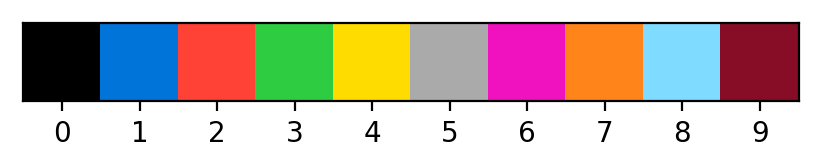

In [19]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [20]:
def get_data(task_filename):
    with open(task_filename, 'r') as f:
        task = json.load(f)
    return task

num2color = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]
color2num = {c: n for n, c in enumerate(num2color)}

In [21]:
def check(task, pred_func):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(3, n, figsize=(4*n,12), dpi=50)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in, t_out)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Train-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in, t_out)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Test-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1

# create_df

In [22]:
# functions for making tags
def neighbours(cur_row, cur_col, nrows, ncols): # function for pickup objects function
    if cur_row==0: top = -1
    else: top = [cur_row-1,cur_col]
    if cur_row==nrows-1: bottom = -1
    else: bottom = [cur_row+1, cur_col]
    if cur_col==0: left = -1
    else: left = [cur_row,cur_col-1]
    if cur_col==ncols-1: right = -1
    else: right = [cur_row, cur_col+1]
    if cur_row == 0 or cur_col == ncols-1: tr = -1
    else: tr = [cur_row-1, cur_col+1]
    if cur_row == 0 or cur_col == 0: tl = -1
    else: tl = [cur_row-1, cur_col-1]
    if cur_row == nrows-1 or cur_col == ncols-1: br = -1
    else: br = [cur_row+1, cur_col+1]
    if cur_row == nrows-1 or cur_col == 0: bl = -1
    else: bl = [cur_row+1, cur_col-1]
    ans = []
    for i in [top, bottom, left, right, tr, tl, br, bl]:
        if i != -1:
            ans.append(i)
    return ans

def make_group(loc, h, w): # function for pickup objects function
    ans = [loc[0].tolist()]
    check_list = [loc[0].tolist()]
    remain = loc[1:].tolist()
    while True:
        check_ele = check_list[0]
        check_list.remove(check_ele)
        neigh = neighbours(check_ele[0], check_ele[1], h, w)
        for i in neigh:
            if i in remain:
                ans.append(i)
                check_list.append(i)
                remain.remove(i)
        if len(check_list) == 0:
            break
    return ans, np.array(remain)

def pickup_objects_unlifted(pixmap):
    try:
        loc = np.argwhere(pixmap > 0)
        h, w = pixmap.shape
        count = 0
        groups = [] # pick up coordinates
        ans = [] # pick up objects
        if len(loc) > 0:
            while True:
                if count == 0:
                    tmp, remain = make_group(loc, h, w)
                else:
                    tmp, remain = make_group(remain, h, w)
                groups.append(tmp)
                count += 1
                if len(remain) == 0:
                    break
            for i in groups:    
                x_min = np.min(np.array(i)[:,0]) # x coordinate np.array(i)[:,0]
                x_max = np.max(np.array(i)[:,0]) # x coordinate
                y_min = np.min(np.array(i)[:,1]) # y coordinate np.array(i)[:,1]
                y_max = np.max(np.array(i)[:,1]) # y coordinate
                tmp = pixmap[x_min:x_max+1, y_min:y_max+1]
                ans.append(tmp)
            return ans
        else:
            return []
    except:
        return []
    
def vertical_line(pixmap):
    flg = 0
    h, w = pixmap.shape
    for i in range(w):
        if np.sum(pixmap[:,i] > 0) == h and len(np.unique(pixmap[:,i])) == 1:
            return True
    return False
    
def horizontal_line(pixmap):
    h, w = pixmap.shape
    for i in range(h):
        if np.sum(pixmap[i,:] > 0) == w and len(np.unique(pixmap[i,:])) == 1:
            return True
    return False

def find_unique_objects(pixmap):
    try:
        if len(pixmap) >=2:
            ans = []
            for tmp in pixmap:
                check = [np.all(tmp == j) for j in ans]
                if np.any(check):
                    true_position = [k for k in range(len(check)) if check[k]][0]
                    ans.pop(true_position)
                else:
                    ans.append(tmp)
            return ans
        else:
            return []
    except:
        return []

def find_same_objects(pixmap):
    try:
        if len(pixmap) >=2:
            uniques = find_unique_objects(pixmap)
            ans = pixmap.copy()
            for u in uniques:
                check = [np.all(tmp == u) for tmp in ans]
                true_position = [k for k in range(len(check)) if check[k]][0]
                ans.pop(true_position)
            if len(ans) >0:
                return [ans[0]]
            else:
                return []
        else:
            return []
    except:
        return []
    
def color_check(color_list):
    tmp = color_list[0]
    for i in range(1,len(color_list)):
        if set(tmp) != set(color_list[i]):
            return False
    return True

In [23]:
def create_df(folder_path):
    task_names_list = sorted(os.listdir(folder_path))
    task_list = []
    for task_name in task_names_list: 
        task_file = str(folder_path / task_name)
        with open(task_file, 'r') as f:
            task = json.load(f)
            task_list.append(task)
    
    df = pd.DataFrame()
    df['task_name'] = task_names_list
    df['task'] = task_list
    df['number_of_train_pairs'] = df['task'].apply(lambda x: len(x['train']))
    df['number_of_test_pairs'] = df['task'].apply(lambda x: len(x['test']))
    
    # Compare image sizes
    df['inputs_all_have_same_height'] = df['task'].apply(
        lambda task: int(len(set([len(example['input']) for example in task['train']])) == 1)
    )
    df['inputs_all_have_same_width'] = df['task'].apply(
        lambda task: int(len(set([len(example['input'][0]) for example in task['train']])) == 1)
    )
    df['inputs_all_have_same_shape'] = df['inputs_all_have_same_height'] * df['inputs_all_have_same_width']
    df['input_height_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['input'])
                     if (len(set([len(example['input']) for example in task['train']])) == 1)
                     else np.nan
    )
    df['input_width_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['input'][0])
                     if (len(set([len(example['input'][0]) for example in task['train']])) == 1)
                     else np.nan
    )
    df['outputs_all_have_same_height'] = df['task'].apply(
        lambda task: int(len(set([len(example['output']) for example in task['train']])) == 1)
    )
    df['outputs_all_have_same_width'] = df['task'].apply(
        lambda task: int(len(set([len(example['output'][0]) for example in task['train']])) == 1)
    )
    df['outputs_all_have_same_shape'] = df['outputs_all_have_same_height'] * df['outputs_all_have_same_width']
    df['output_height_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['output'])
                     if (len(set([len(example['output']) for example in task['train']])) == 1)
                     else np.nan
    )
    df['output_width_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['output'][0])
                     if (len(set([len(example['output'][0]) for example in task['train']])) == 1)
                     else np.nan
    )  
    df['in_each_pair_shape_doesnt_change'] = df['task'].apply(
        lambda task: np.prod([int(len(example['input'][0])==len(example['output'][0])
                                  and len(example['input'])==len(example['output'])
                                 ) for example in task['train']
                            ])
    )
    df['in_each_pair_shape_ratio_is_the_same'] = df['task'].apply(
        lambda task: (len(set([len(example['input'][0]) / len(example['output'][0])
                                 for example in task['train']]))==1) * (
                      len(set([len(example['input']) / len(example['output'])
                                 for example in task['train']]))==1)
    )
    df['o/i_height_ratio_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['output']) / len(task['train'][0]['input'])
                     if (len(set([len(example['input']) / len(example['output'])
                                 for example in task['train']]))==1)
                     else np.nan
    )
    df['o/i_width_ratio_if_constant'] = df['task'].apply(
        lambda task: len(task['train'][0]['output'][0]) / len(task['train'][0]['input'][0])
                     if (len(set([len(example['input'][0]) / len(example['output'][0])
                                 for example in task['train']]))==1)
                     else np.nan
    )
    
    # my idea ---------
    #df["same_color_sum"] = df['task'].apply(lambda task: 
    #                    np.all([int(sum(sum(np.array(example['input']))) == sum(sum(np.array(example['output'])))) for example in task['train']]))
    #df["increase_color_sum"] = df['task'].apply(lambda task: 
    #                    np.all([int(sum(sum(np.array(example['input']))) < sum(sum(np.array(example['output'])))) for example in task['train']]))
    #df["decrease_color_sum"] = df['task'].apply(lambda task: 
    #                    np.all([int(sum(sum(np.array(example['input']))) > sum(sum(np.array(example['output'])))) for example in task['train']]))
    #df["same_color_block"] = df['task'].apply(lambda task: 
    #                    np.all([np.sum(np.array(example['input'])>0) == np.sum(np.array(example['output'])>0) for example in task['train']]))
    #df["increase_color_block"] = df['task'].apply(lambda task: 
    #                    np.all([np.sum(np.array(example['input'])>0) < np.sum(np.array(example['output'])>0) for example in task['train']]))
    #df["decrease_color_block"] = df['task'].apply(lambda task: 
    #                    np.all([np.sum(np.array(example['input'])>0) > np.sum(np.array(example['output'])>0) for example in task['train']]))
    #df['decrease_objects'] = df['task'].apply(lambda task: np.all([len(pickup_objects_unlifted(np.array(example['input']))) > len(pickup_objects_unlifted(np.array(example['output'])))
    #                                           for example in task["train"]]))
    #df['increase_objects'] = df['task'].apply(lambda task: np.all([len(pickup_objects_unlifted(np.array(example['input']))) < len(pickup_objects_unlifted(np.array(example['output'])))
    #                                           for example in task["train"]]))
    #df["horizontal_line"] = df['task'].apply(lambda task: np.all([horizontal_line(np.array(example["input"])) for example in task["train"]]))
    #df["vertical_line"] = df['task'].apply(lambda task: np.all([vertical_line(np.array(example["input"])) for example in task["train"]]))
    #df["horizontal_line"] = df['task'].apply(lambda task: np.all([horizontal_line(np.array(example["input"])) for example in task["train"]]))
    #df["gray delete"] = df['task'].apply(lambda task: np.all([np.sum(np.array(example['input'])==color2num["gray"]) > 0
    #                                                          and np.sum(np.array(example['output'])==color2num["gray"]) == 0 for example in task["train"]]))
    #df["repeat_pattern"] = df['task'].apply(lambda task: np.all([len(find_same_objects(pickup_objects_unlifted(np.array(example['output'])))) > 0 for example in task["train"]]))
    #df["just_increase"] = df['task'].apply(lambda task: np.all([np.sum((np.array(example['output'])- (np.array(example['input']))<0)) == 0 
    #                                                           if np.array(example['input']).shape[0] == np.array(example['output']).shape[0] and 
    #                                                            np.array(example['input']).shape[1] == np.array(example['output']).shape[1]
    #                                                            else 0 for example in task["train"]] ))
    # **
    df["input_color_change_or_not"] = df['task'].apply(lambda task: color_check([list(np.unique(np.array(example['input']))) for example in task["train"]] ))
    # **
    df['color_kind_increase'] = df['task'].apply(
        lambda task: np.all([set(np.unique(np.array(example['input']))).issubset(set(np.unique(np.array(example['output'])))) and 
                             len(set(np.unique(np.array(example['input'])))) < len(set(np.unique(np.array(example['output'])))) for example in task['train']]))
    df['color_kind_decrease'] = df['task'].apply(
        lambda task: np.all([set(np.unique(np.array(example['output']))).issubset(set(np.unique(np.array(example['input'])))) and 
                             len(set(np.unique(np.array(example['output'])))) < len(set(np.unique(np.array(example['input'])))) for example in task['train']]))
    df["color_kind_same"] = df['task'].apply(
        lambda task: np.all([set(np.unique(np.array(example['output']))).issubset(set(np.unique(np.array(example['input'])))) and 
                             len(set(np.unique(np.array(example['output'])))) == len(set(np.unique(np.array(example['input'])))) for example in task['train']]))
    df['smaller_output'] = df['task'].apply(
        lambda task: np.all([(np.array(example['input']).shape[0] >= np.array(example['output']).shape[0] and 
                             np.array(example['input']).shape[1] >= np.array(example['output']).shape[1] and 
                             (np.array(example['input']).shape[0] > np.array(example['output']).shape[0] or 
                             np.array(example['input']).shape[1] > np.array(example['output']).shape[1])) for example in task['train']]))
    df['larger_output'] = df['task'].apply(
        lambda task: np.all([(np.array(example['input']).shape[0] <= np.array(example['output']).shape[0] and 
                             np.array(example['input']).shape[1] <= np.array(example['output']).shape[1] and 
                             (np.array(example['input']).shape[0] < np.array(example['output']).shape[0] or 
                             np.array(example['input']).shape[1] < np.array(example['output']).shape[1])) for example in task['train']]))
    df['2times_expansion'] = df['task'].apply(
        lambda task: np.all([np.array(example['input']).shape[0] * 2 == np.array(example['output']).shape[0] and 
                             np.array(example['input']).shape[1] * 2 == np.array(example['output']).shape[1] for example in task['train']]))
    df['3times_expansion'] = df['task'].apply(
        lambda task: np.all([np.array(example['input']).shape[0] * 3 == np.array(example['output']).shape[0] and 
                             np.array(example['input']).shape[1] * 3 == np.array(example['output']).shape[1] for example in task['train']]))
    return df


training_descriptive_df = create_df(training_path)
evaluation_descriptive_df = create_df(evaluation_path)
test_descriptive_df = create_df(test_path)

In [24]:
def plot_one(ax, i,train_or_test,input_or_output):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)    
    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])     
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(train_or_test + ' '+input_or_output)
    
def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """    
    num_train = len(task['train'])
    fig, axs = plt.subplots(2, num_train, figsize=(3*num_train,3*2))
    for i in range(num_train):     
        plot_one(axs[0,i],i,'train','input')
        plot_one(axs[1,i],i,'train','output')        
    plt.tight_layout()
    plt.show()    
    
    num_test = len(task['test'])
    fig, axs = plt.subplots(2, num_test, figsize=(3*num_test,3*2))
    if num_test==1: 
        plot_one(axs[0],0,'test','input')
        plot_one(axs[1],0,'test','output')     
    else:
        for i in range(num_test):      
            plot_one(axs[0,i],i,'test','input')
            plot_one(axs[1,i],i,'test','output')  
    plt.tight_layout()
    plt.show()

In [25]:
def classification(row):
    # same shape and color doesn't change in input and color kind decrease
    if row["in_each_pair_shape_doesnt_change"] == 1 and row["o/i_height_ratio_if_constant"] ==1 and row["o/i_width_ratio_if_constant"]==1 and row.input_color_change_or_not==1 and row.color_kind_decrease==1:
        return 1
    # same shape and color doesn't change in input and color kind increase
    elif row["in_each_pair_shape_doesnt_change"] == 1 and row["o/i_height_ratio_if_constant"] ==1 and row["o/i_width_ratio_if_constant"]==1 and row.input_color_change_or_not==1 and row.color_kind_increase==1:
        return 2
    # same shape and color doesn't change in input and color kind same
    elif row["in_each_pair_shape_doesnt_change"] == 1 and row["o/i_height_ratio_if_constant"] ==1 and row["o/i_width_ratio_if_constant"]==1 and row.input_color_change_or_not==1 and row.color_kind_same==1:
        return 3
    # same shape and color doesn't change in input and otherwise
    elif row["in_each_pair_shape_doesnt_change"] == 1 and row["o/i_height_ratio_if_constant"] ==1 and row["o/i_width_ratio_if_constant"]==1 and row.input_color_change_or_not==1 and row.color_kind_increase==0  and row.color_kind_decrease==0 and row.color_kind_same==0:
        return 4
    # same shape and input colors change and color kind decrease
    if row["in_each_pair_shape_doesnt_change"] == 1 and row["o/i_height_ratio_if_constant"] ==1 and row["o/i_width_ratio_if_constant"]==1 and row.input_color_change_or_not==0 and row.color_kind_decrease==1:
        return 5
    # same shape and input colors change and color kind increase
    if row["in_each_pair_shape_doesnt_change"] == 1 and row["o/i_height_ratio_if_constant"] ==1 and row["o/i_width_ratio_if_constant"]==1 and row.input_color_change_or_not==0 and row.color_kind_increase==1:
        return 6
    # same shape and input colors change and color kind same
    if row["in_each_pair_shape_doesnt_change"] == 1 and row["o/i_height_ratio_if_constant"] ==1 and row["o/i_width_ratio_if_constant"]==1 and row.input_color_change_or_not==0 and row.color_kind_same==1:
        return 7
    # same shape and input colors change and otherwise
    elif row["in_each_pair_shape_doesnt_change"] == 1 and row["o/i_height_ratio_if_constant"] ==1 and row["o/i_width_ratio_if_constant"]==1 and row.input_color_change_or_not==0 and row.color_kind_increase==0  and row.color_kind_decrease==0 and row.color_kind_same==0:
        return 8
    # otherwise
    elif row["smaller_output"] == 1 and row["outputs_all_have_same_shape"] == 1:
        return 9
    elif row["larger_output"] == 1 and row["outputs_all_have_same_shape"] == 1:
        return 10
    elif row["larger_output"] == 1 and row["outputs_all_have_same_shape"] == 0 and row["2times_expansion"]==1:
        return 11
    elif row["larger_output"] == 1 and row["outputs_all_have_same_shape"] == 0 and row["3times_expansion"]==1:
        return 12
    else:
        return 13

training_descriptive_df["class"] = training_descriptive_df.apply(lambda x: classification(x), axis=1)
evaluation_descriptive_df["class"] = evaluation_descriptive_df.apply(lambda x: classification(x), axis=1)
test_descriptive_df["class"] = test_descriptive_df.apply(lambda x: classification(x), axis=1)

# result of classification

4, 1.0%
103eff5b.json


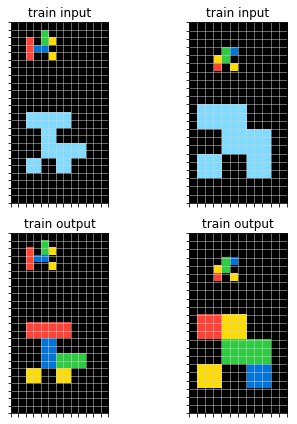

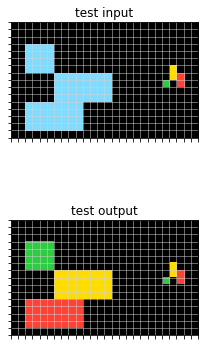

47996f11.json


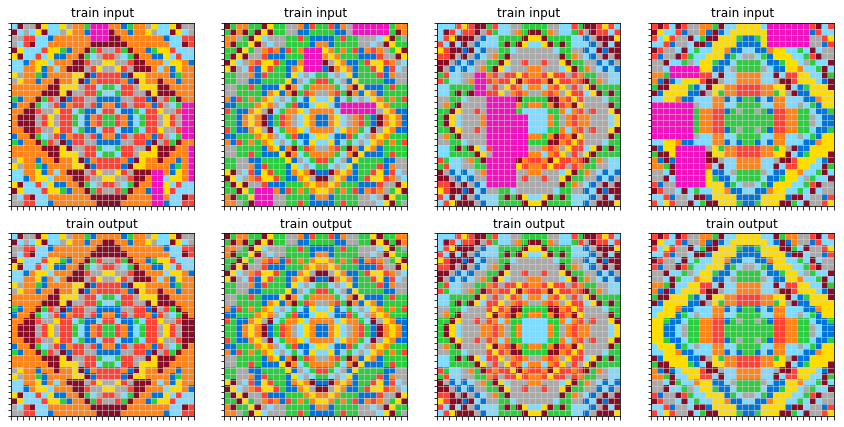

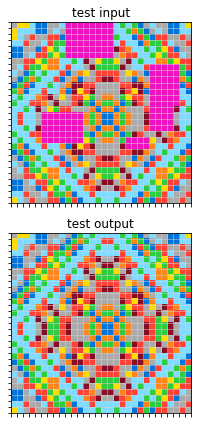

4cd1b7b2.json


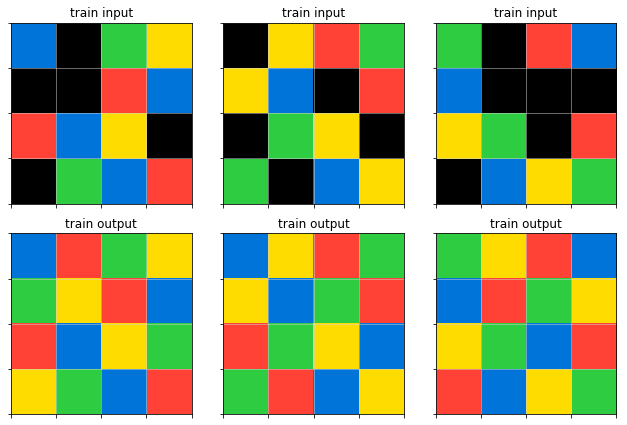

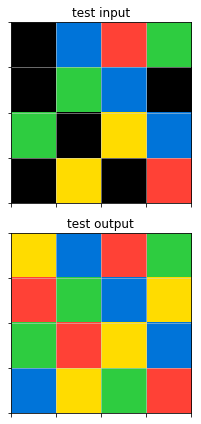

7c8af763.json


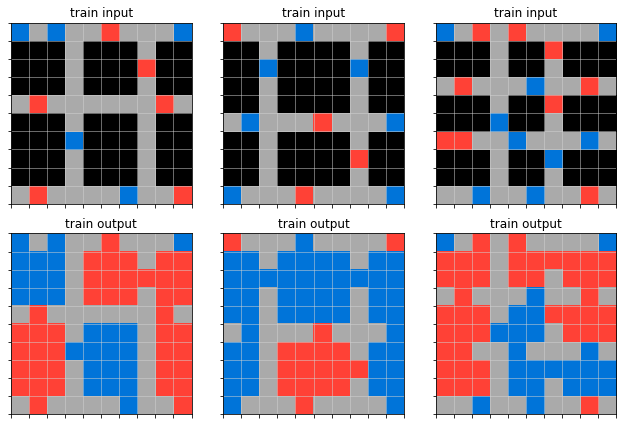

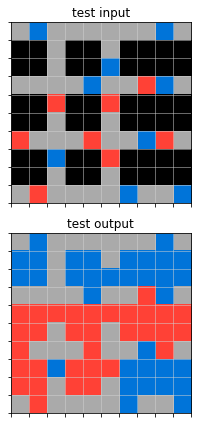

9bebae7a.json


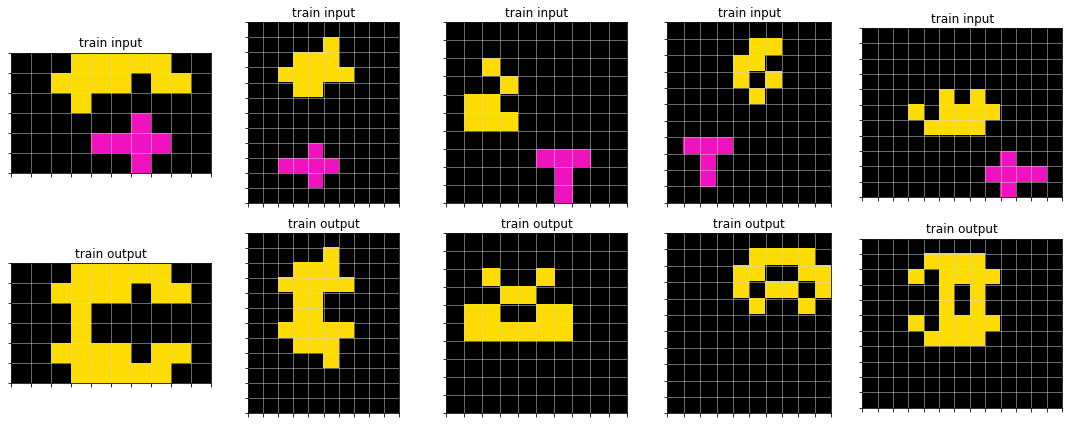

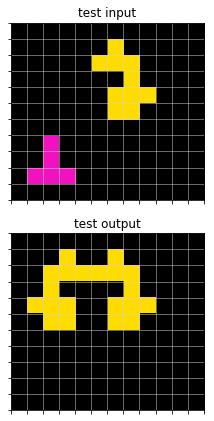

f5c89df1.json


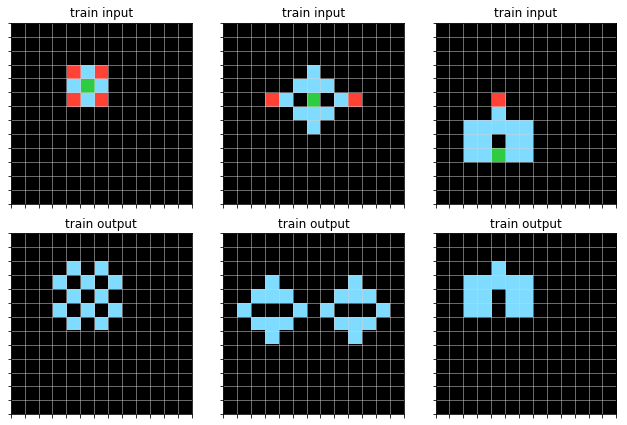

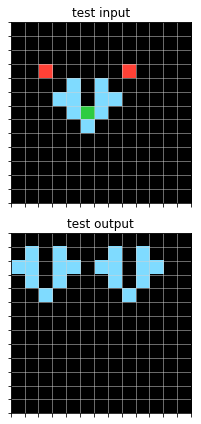

f9d67f8b.json


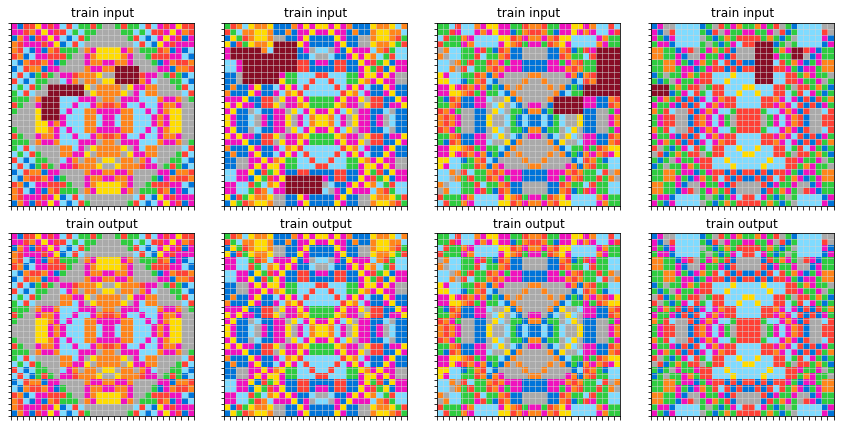

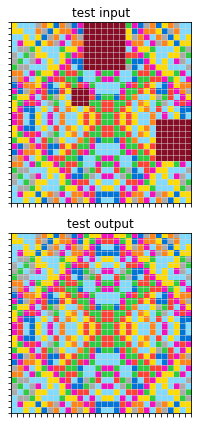

7, 1.75%
1, 1.0%


In [26]:
tmp = training_descriptive_df[training_descriptive_df["class"] == 1]

#for i in tmp["task_name"]:
#    print(i)
#    task = get_data(str(training_path / i))
#    plot_task(task)
        
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / training_descriptive_df.shape[0])+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df["class"] == 1]

tmp0_eval = tmp.copy()
for i in tmp["task_name"]:
    print(i)
    task = get_data(str(evaluation_path / i))
    plot_task(task)
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / evaluation_descriptive_df.shape[0])+"%")

tmp = test_descriptive_df[test_descriptive_df["class"] == 1]

tmp0_test = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / test_descriptive_df.shape[0])+"%")

In [27]:
tmp = training_descriptive_df[training_descriptive_df["class"] == 2]

#for i in tmp["task_name"]:
#    print(i)
#    task = get_data(str(training_path / i))
#    plot_task(task)
        
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / training_descriptive_df.shape[0])+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df["class"] ==2]

tmp0_eval = tmp.copy()
#for i in tmp["task_name"]:
#    print(i)
#    task = get_data(str(evaluation_path / i))
#    plot_task(task)
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / evaluation_descriptive_df.shape[0])+"%")

tmp = test_descriptive_df[test_descriptive_df["class"] == 2]

tmp0_test = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / test_descriptive_df.shape[0])+"%")

57, 14.25%
57, 14.25%
15, 15.0%


In [28]:
tmp = training_descriptive_df[training_descriptive_df["class"] == 3]

#for i in tmp["task_name"]:
#    print(i)
#    task = get_data(str(training_path / i))
#    plot_task(task)
        
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / training_descriptive_df.shape[0])+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df["class"] ==3]

tmp0_eval = tmp.copy()
#for i in tmp["task_name"]:
#    print(i)
#    task = get_data(str(evaluation_path / i))
#    plot_task(task)
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / evaluation_descriptive_df.shape[0])+"%")

tmp = test_descriptive_df[test_descriptive_df["class"] == 3]

tmp0_test = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / test_descriptive_df.shape[0])+"%")

31, 7.75%
34, 8.5%
4, 4.0%


13, 3.25%
12422b43.json


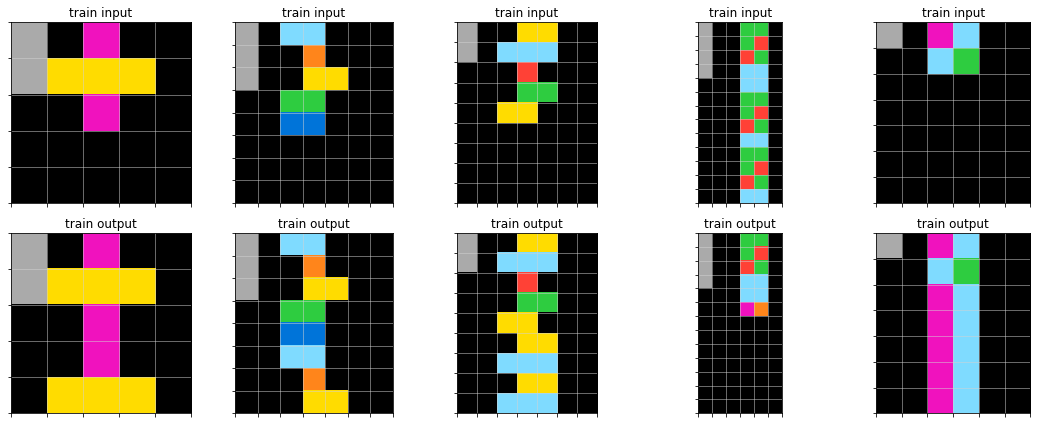

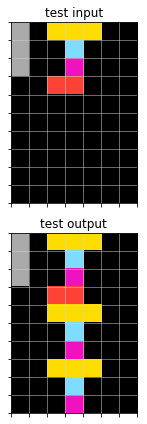

12eac192.json


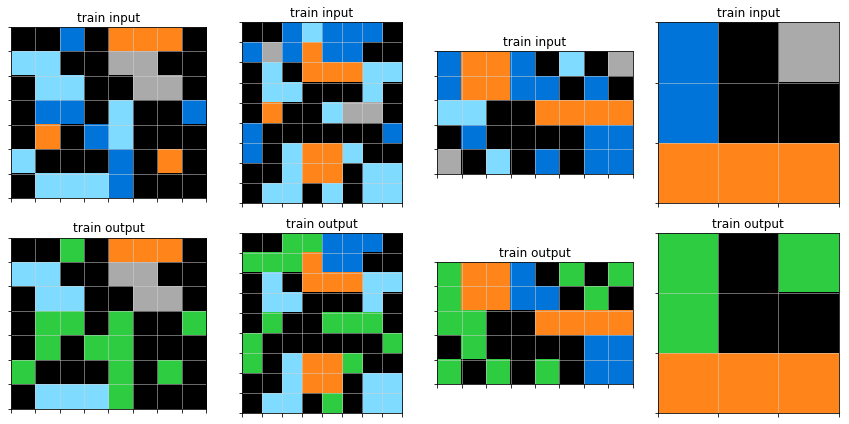

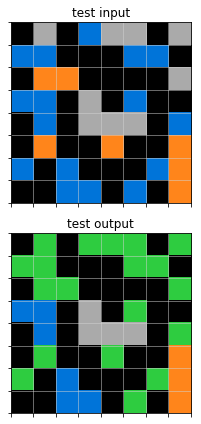

32e9702f.json


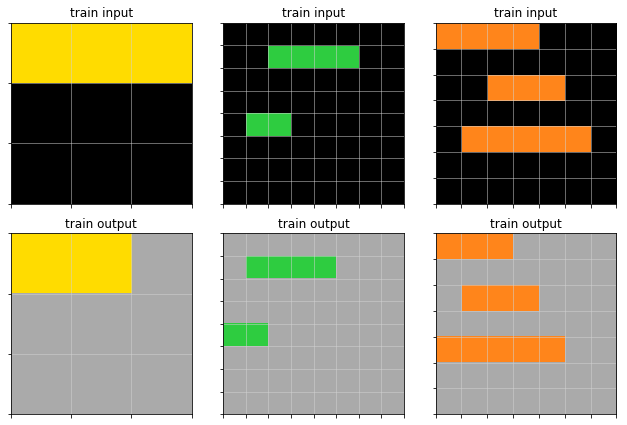

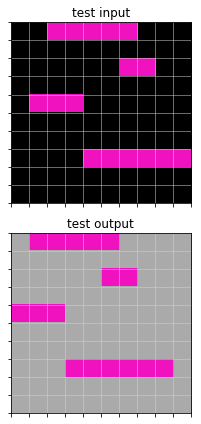

4b6b68e5.json


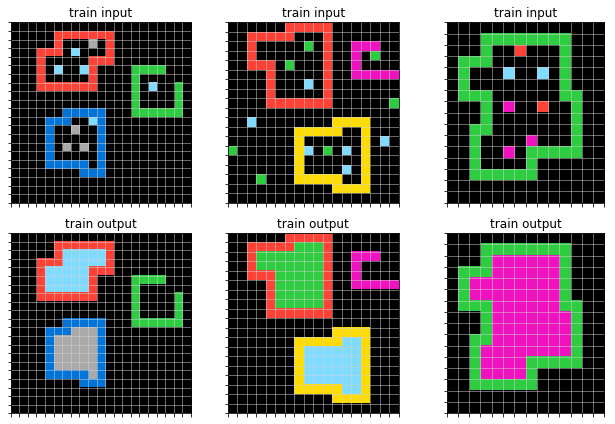

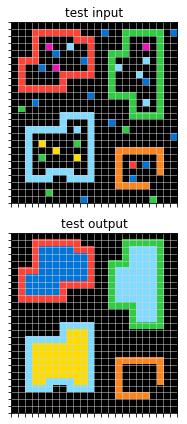

6ea4a07e.json


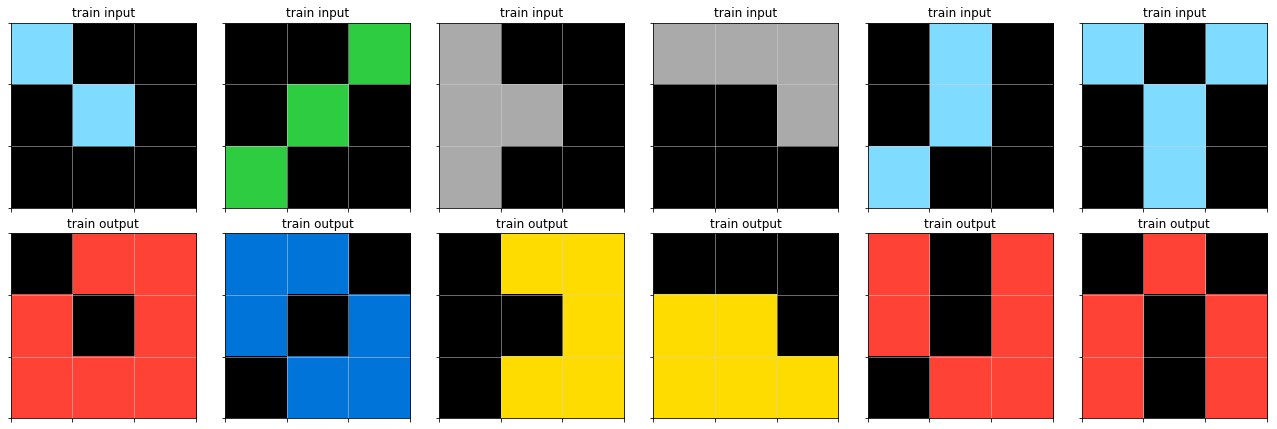

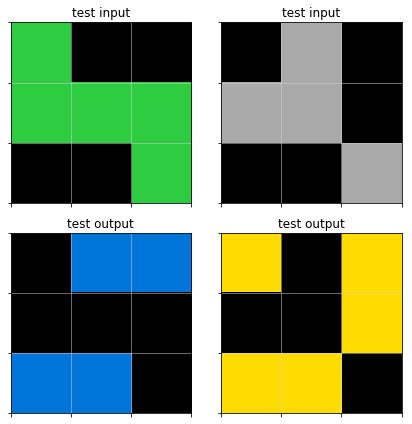

b20f7c8b.json


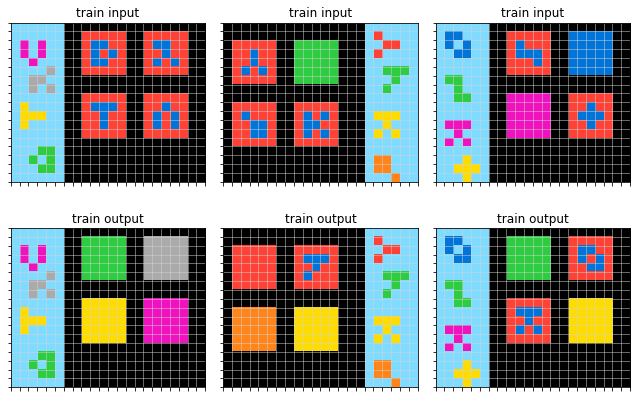

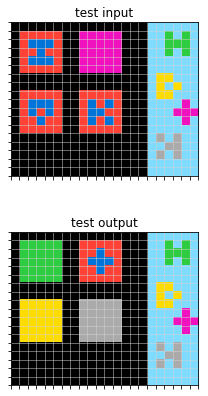

d2acf2cb.json


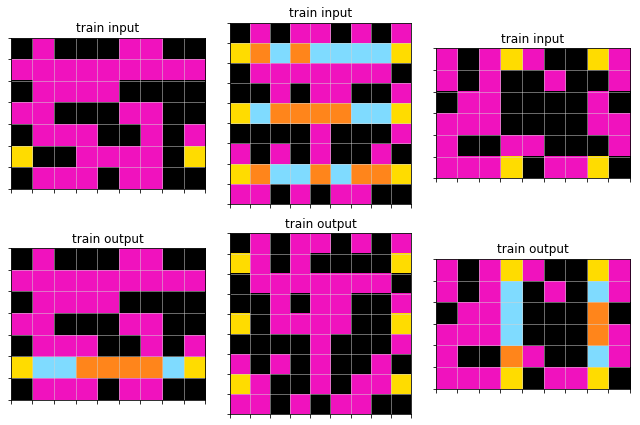

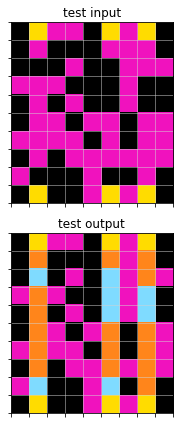

e7b06bea.json


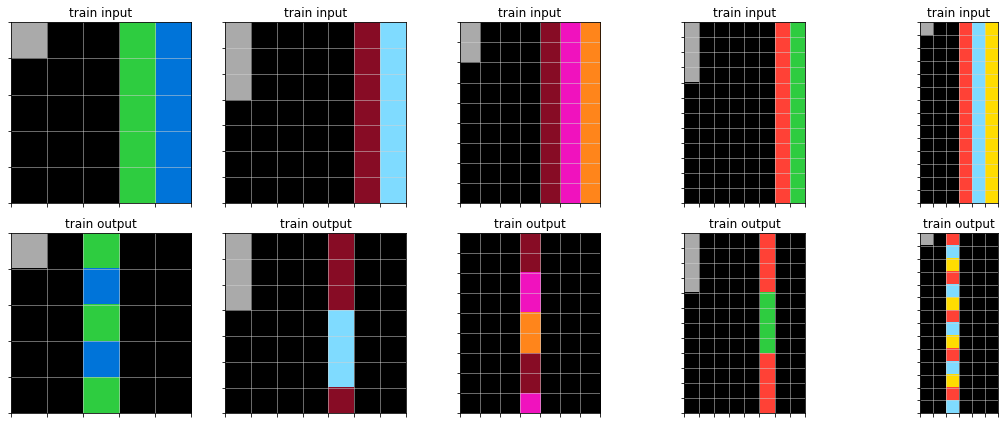

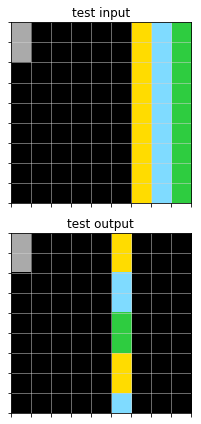

e9bb6954.json


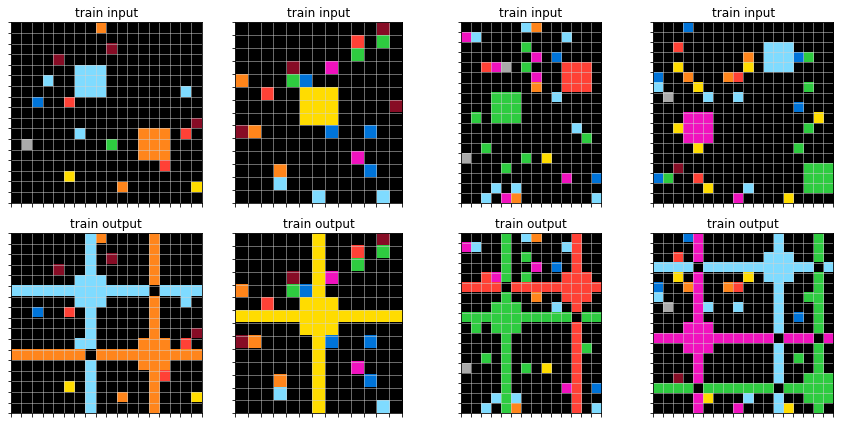

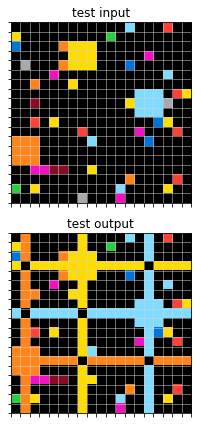

9, 2.25%
3, 3.0%


In [29]:
tmp = training_descriptive_df[training_descriptive_df["class"] == 8]

#for i in tmp["task_name"]:
#    print(i)
#    task = get_data(str(training_path / i))
#    plot_task(task)
        
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / training_descriptive_df.shape[0])+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df["class"] ==8]

tmp0_eval = tmp.copy()
for i in tmp["task_name"]:
    print(i)
    task = get_data(str(evaluation_path / i))
    plot_task(task)
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / evaluation_descriptive_df.shape[0])+"%")

tmp = test_descriptive_df[test_descriptive_df["class"] == 8]

tmp0_test = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / test_descriptive_df.shape[0])+"%")

83, 20.75%
00576224.json


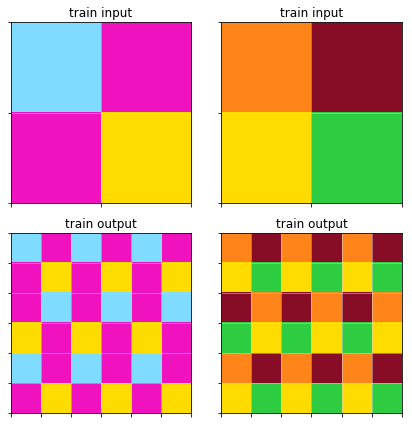

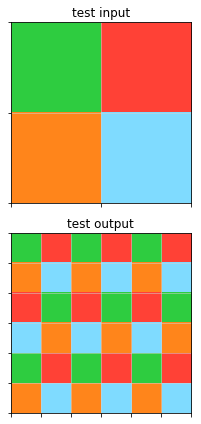

0692e18c.json


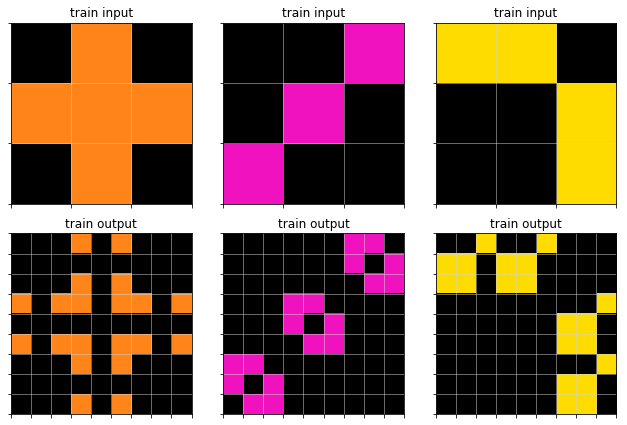

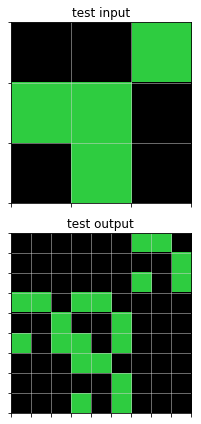

0934a4d8.json


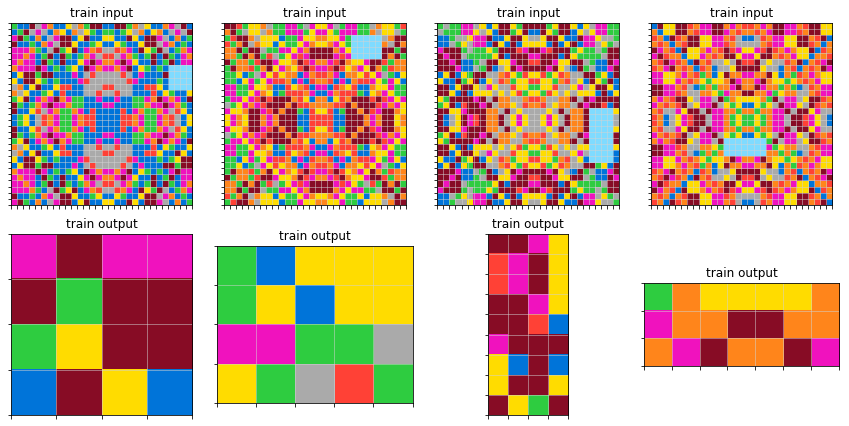

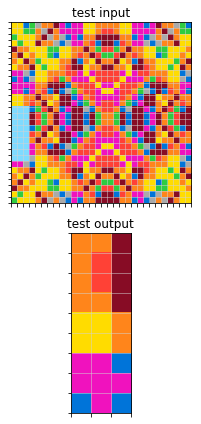

0a1d4ef5.json


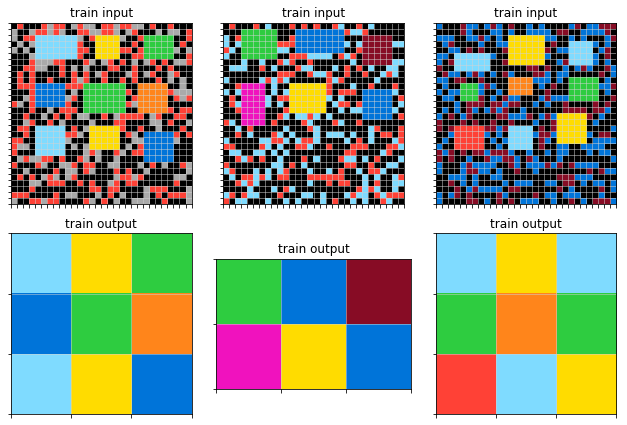

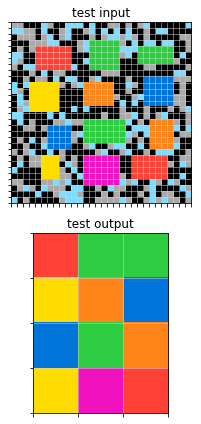

0c786b71.json


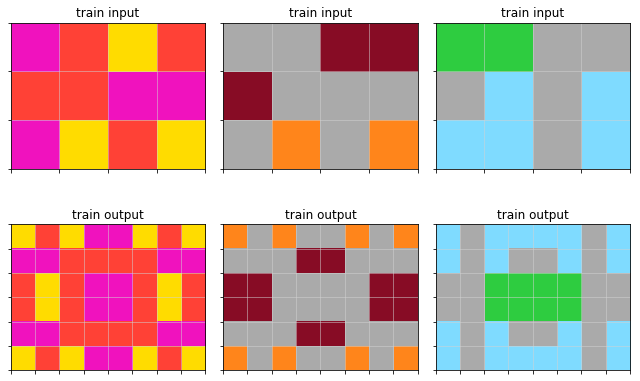

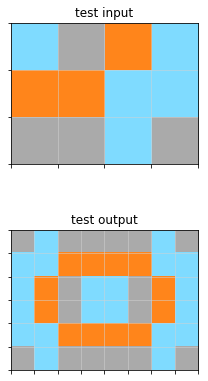

12997ef3.json


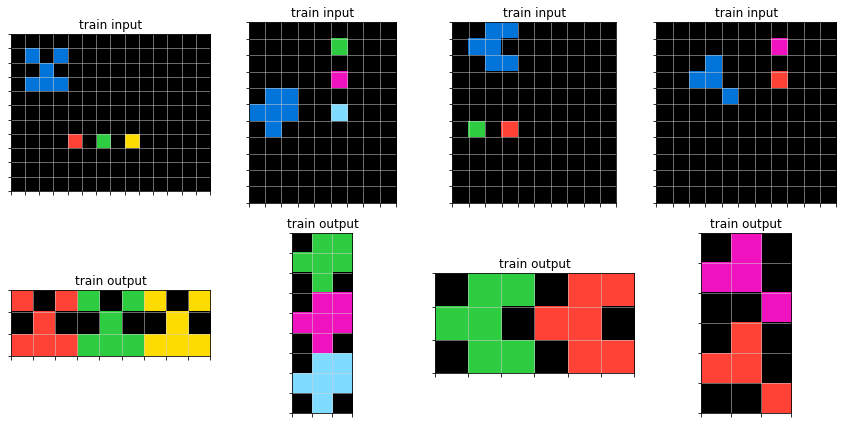

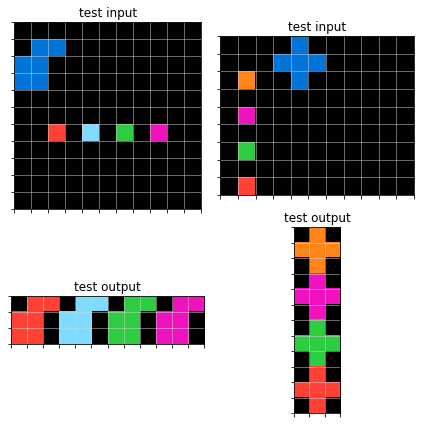

136b0064.json


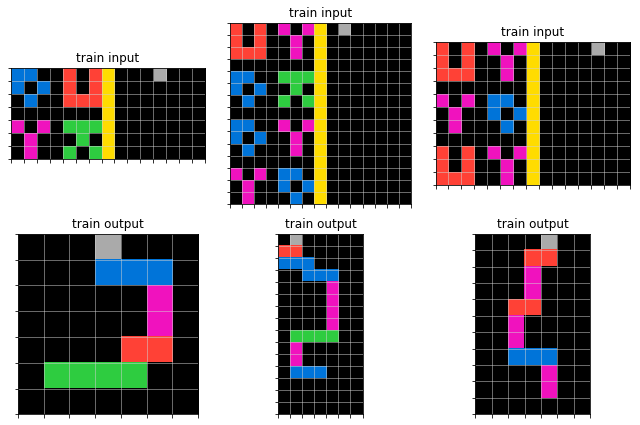

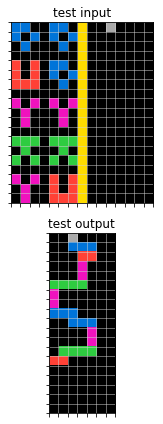

15696249.json


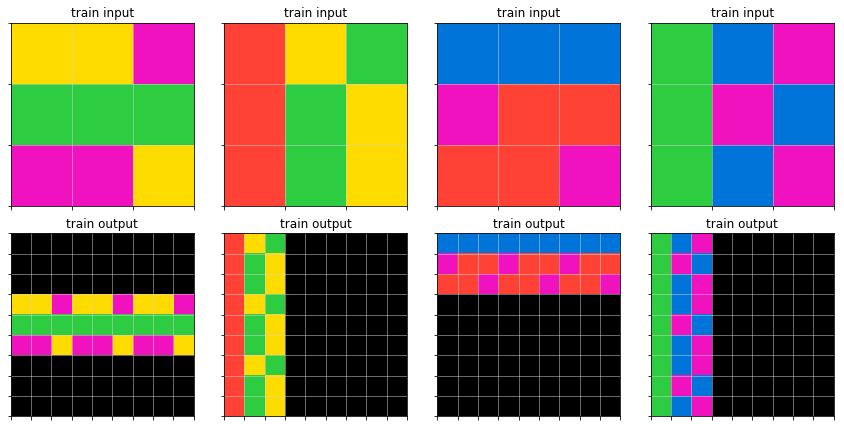

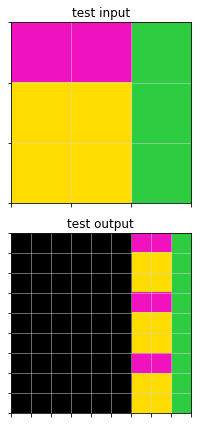

1a6449f1.json


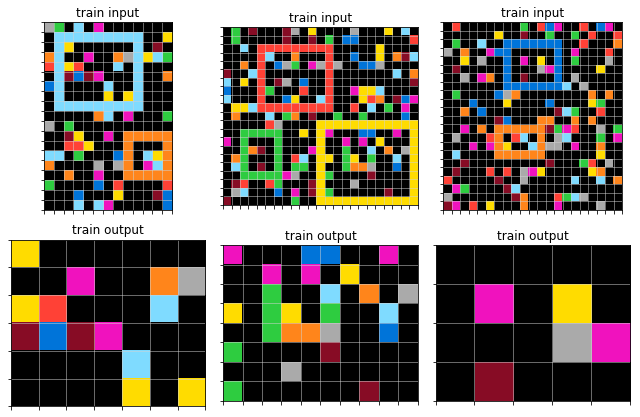

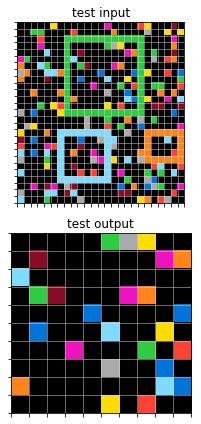

2037f2c7.json


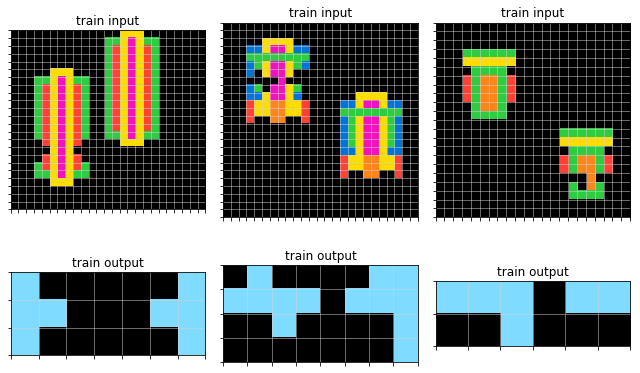

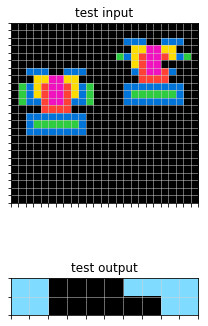

2072aba6.json


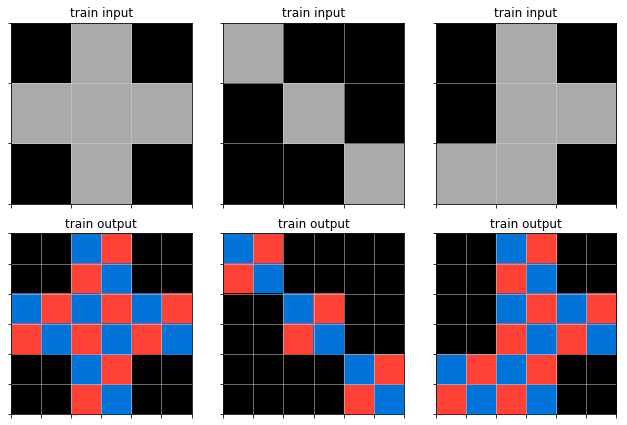

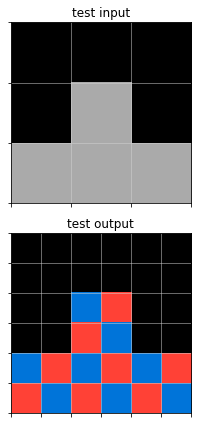

20818e16.json


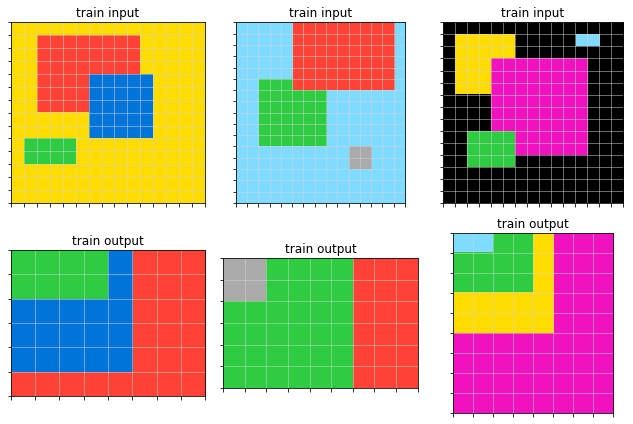

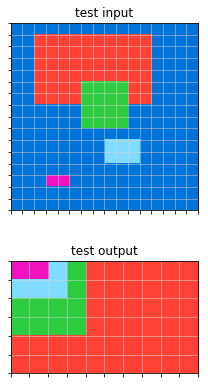

2697da3f.json


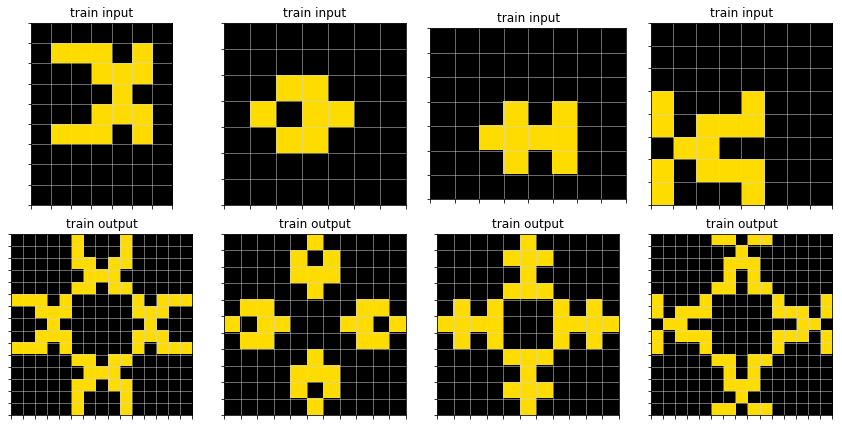

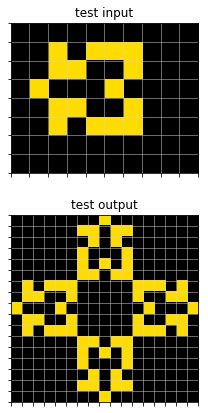

2753e76c.json


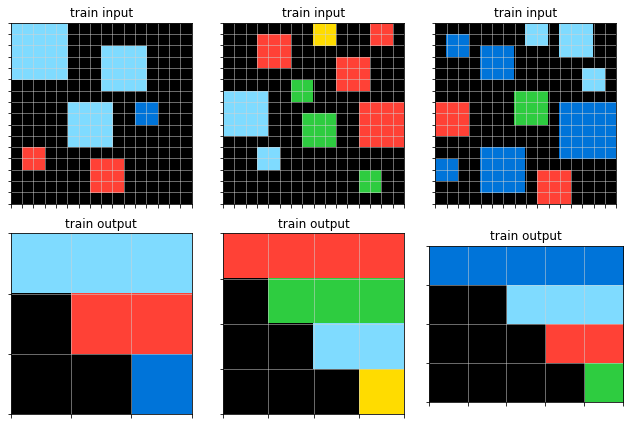

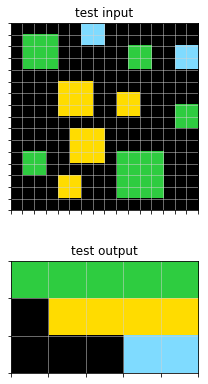

27f8ce4f.json


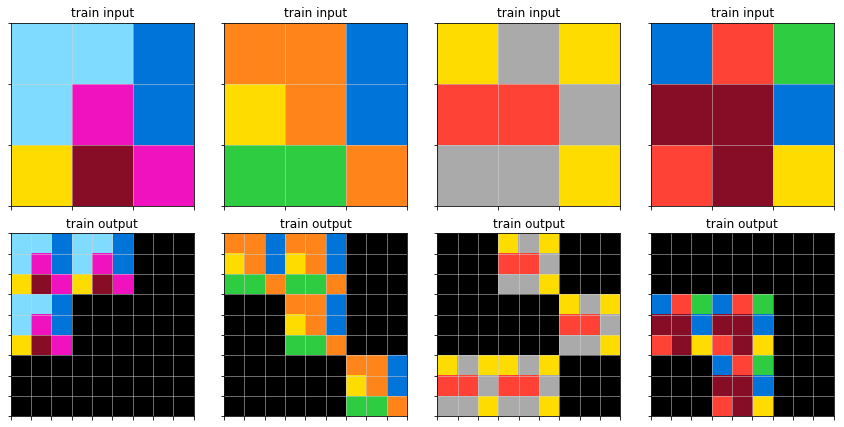

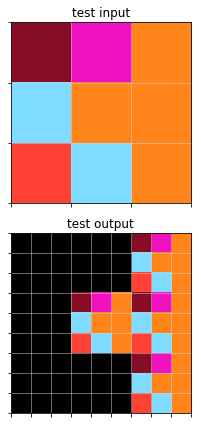

2c0b0aff.json


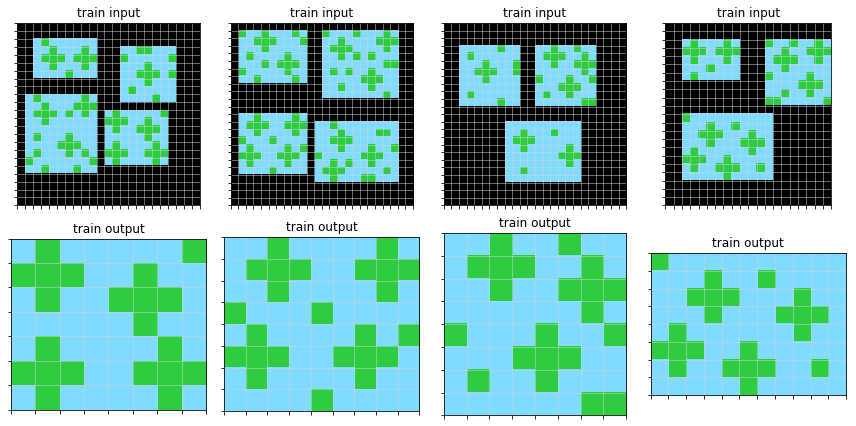

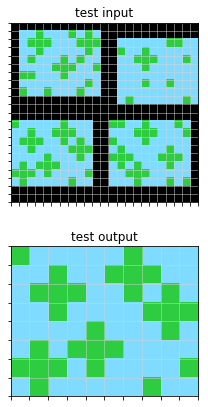

2f0c5170.json


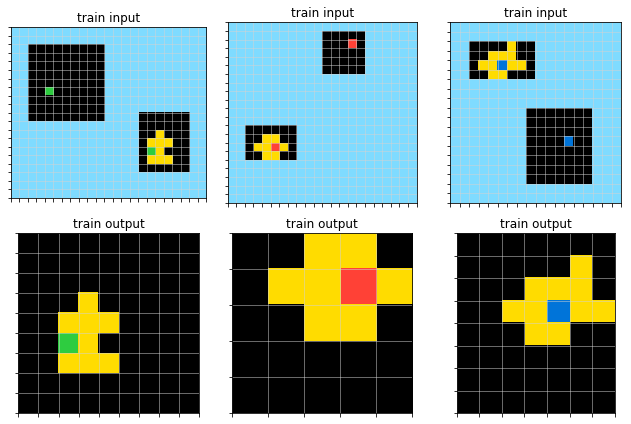

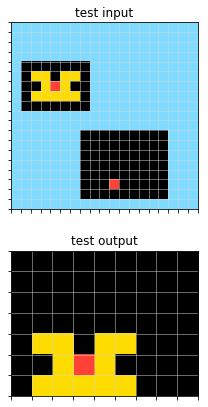

310f3251.json


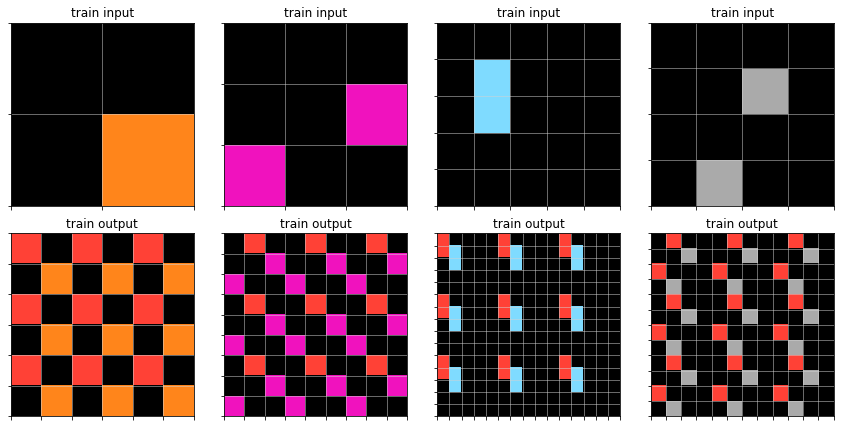

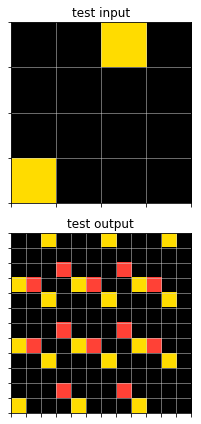

3979b1a8.json


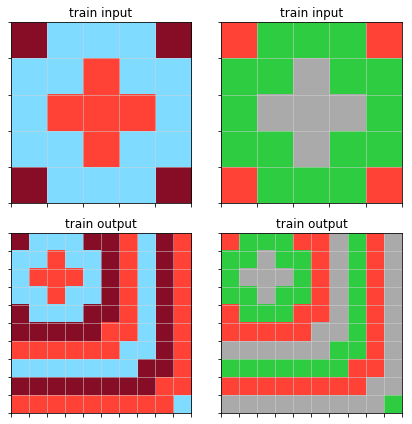

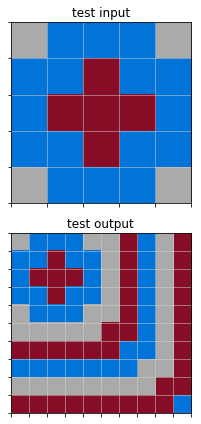

3ee1011a.json


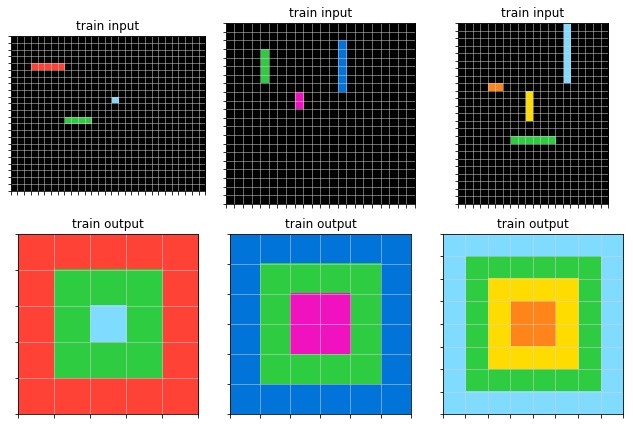

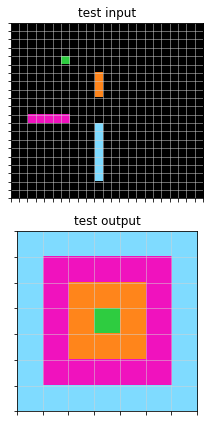

414297c0.json


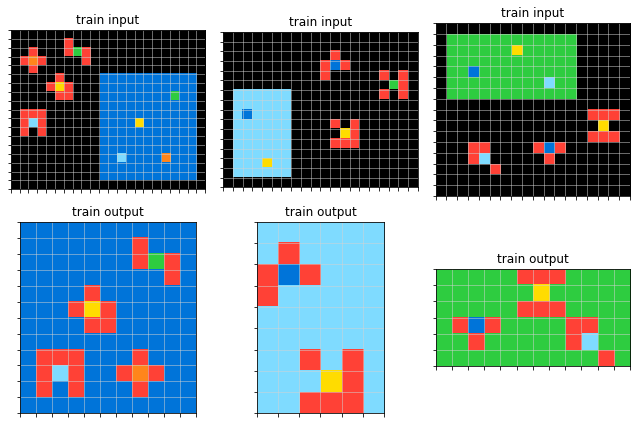

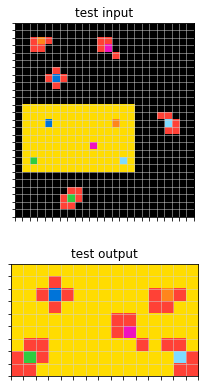

48131b3c.json


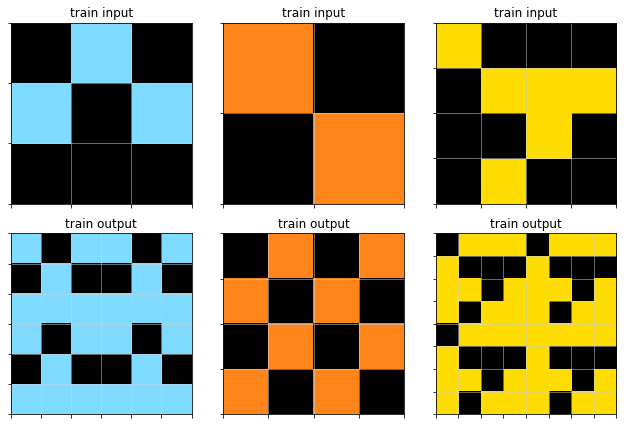

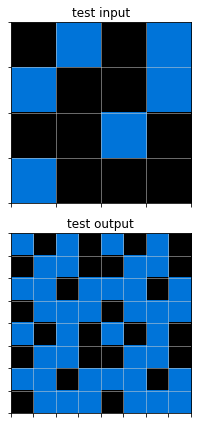

4852f2fa.json


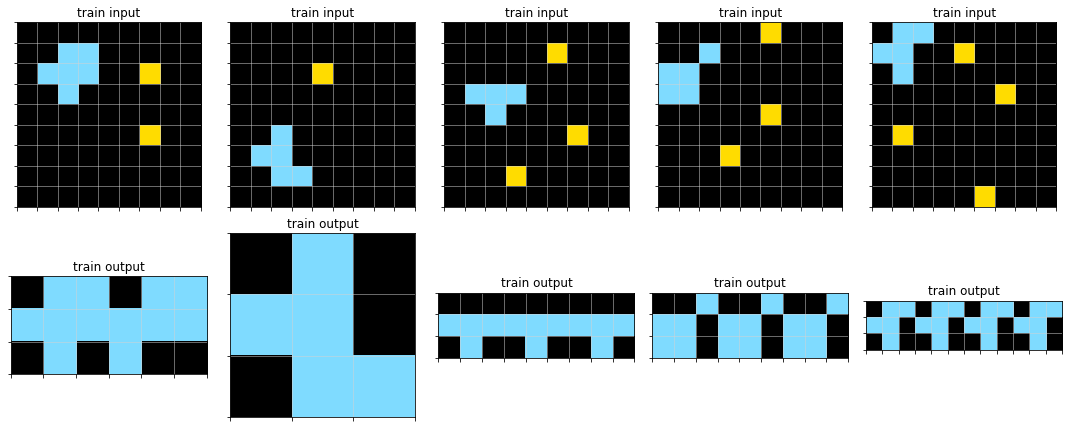

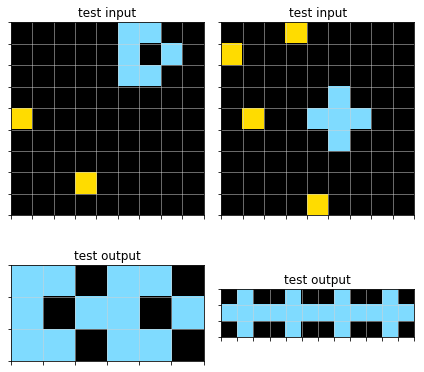

48f8583b.json


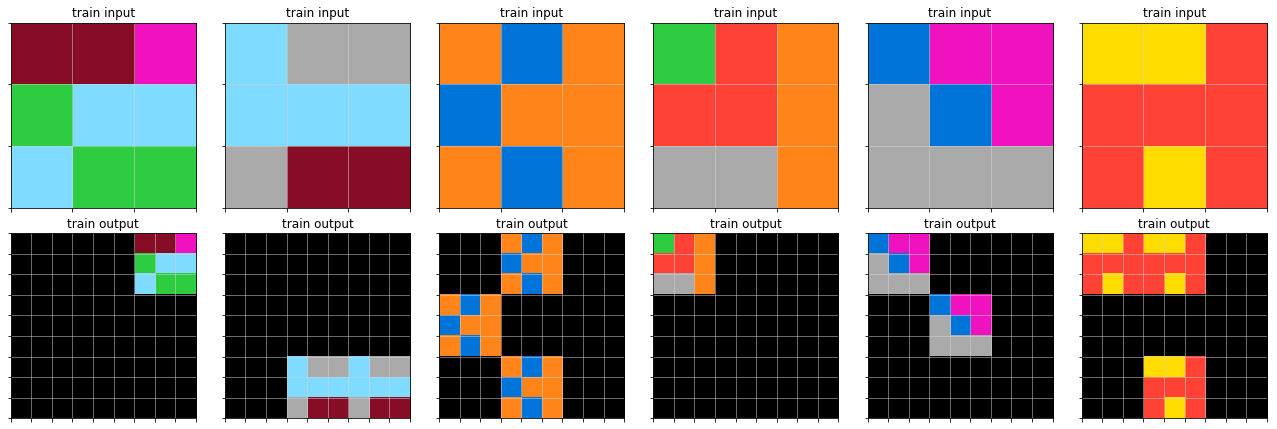

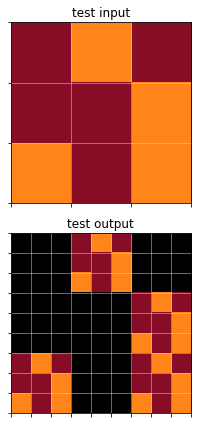

505fff84.json


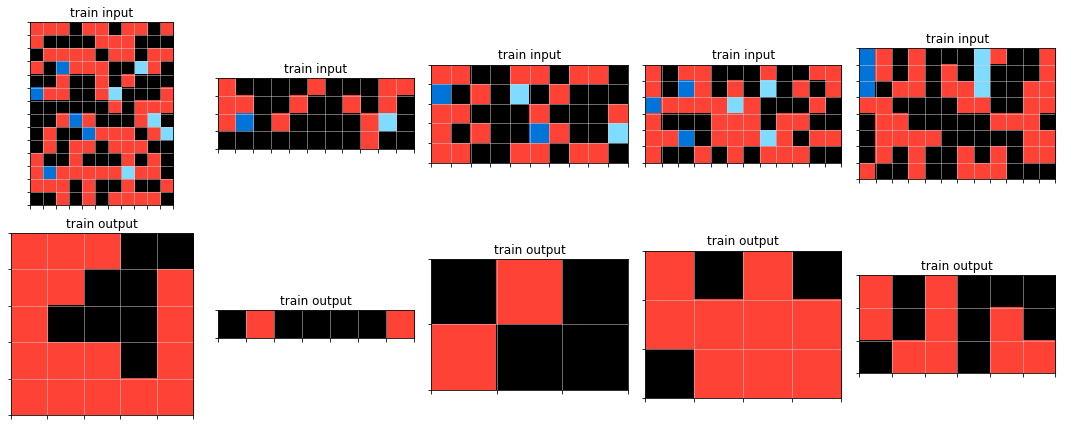

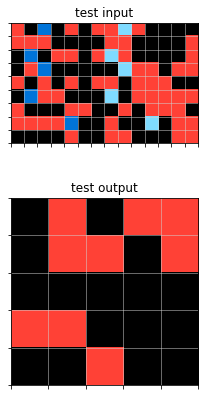

50aad11f.json


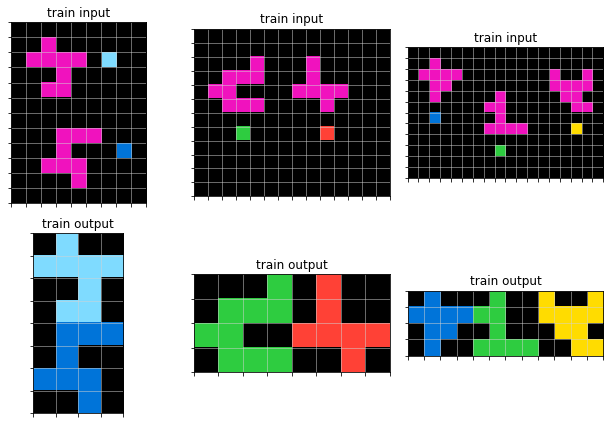

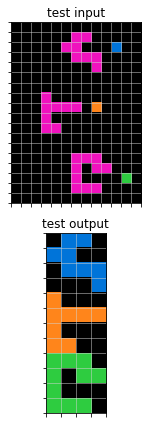

5833af48.json


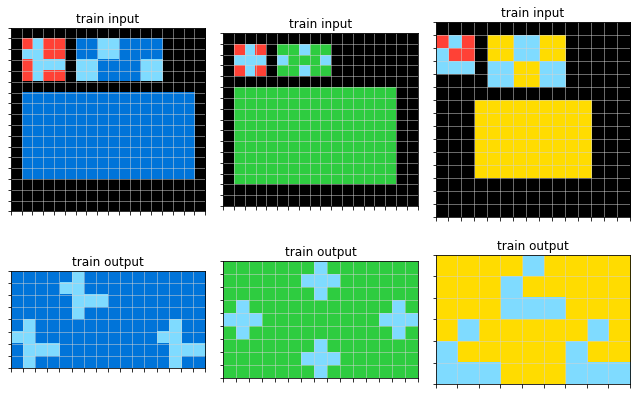

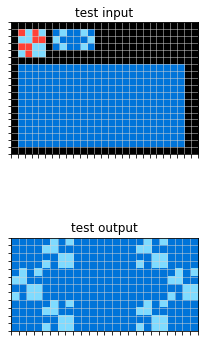

59341089.json


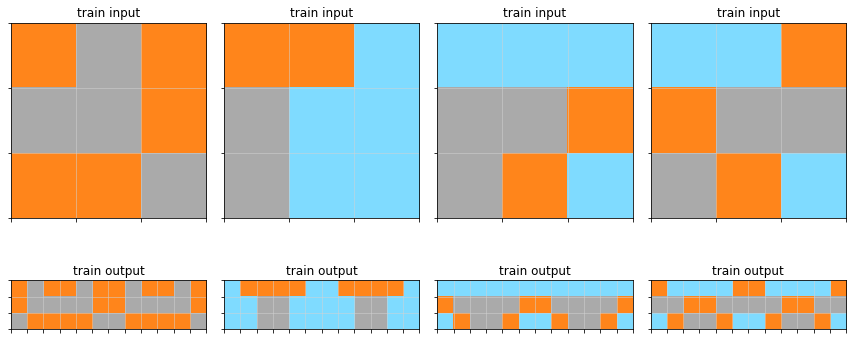

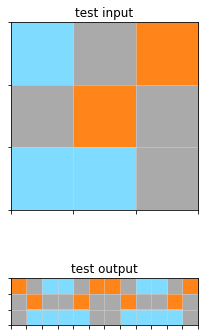

5b6cbef5.json


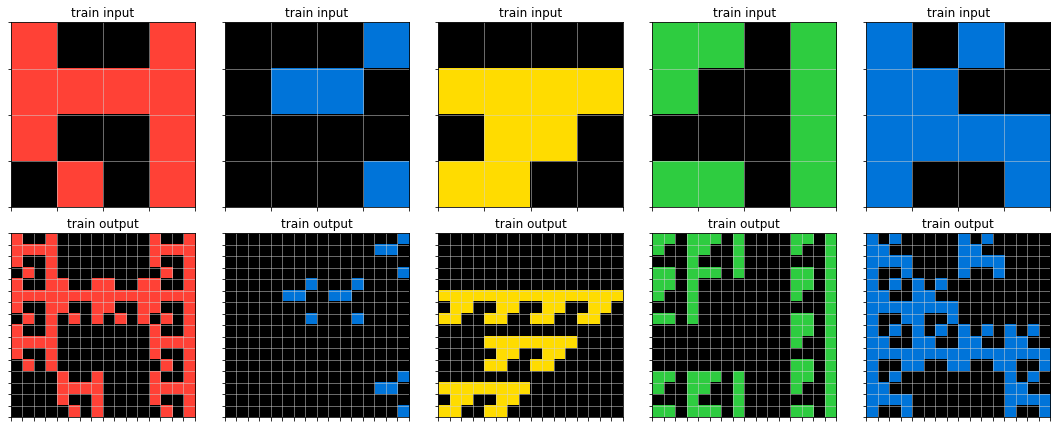

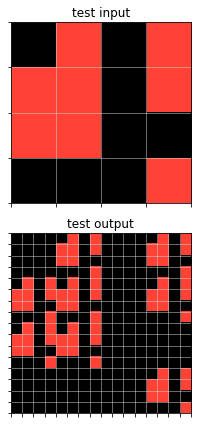

60c09cac.json


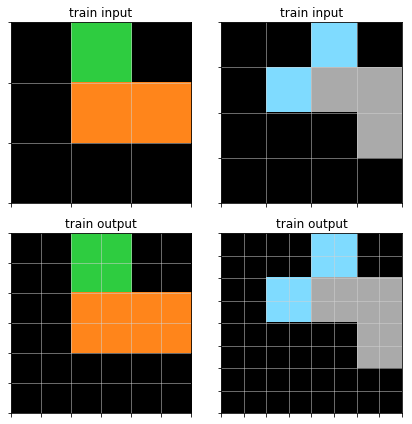

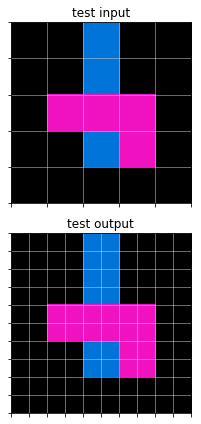

67636eac.json


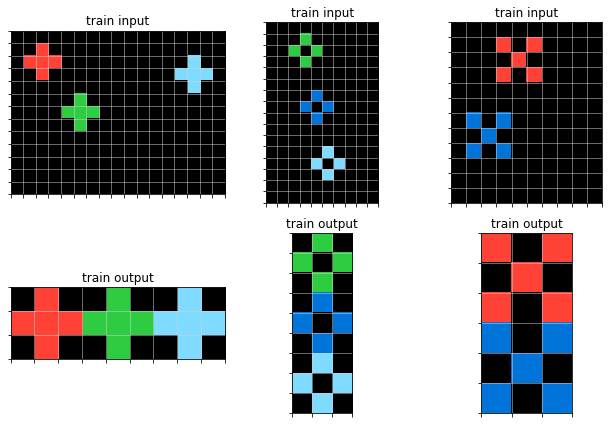

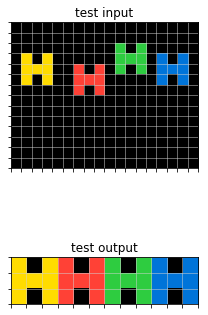

695367ec.json


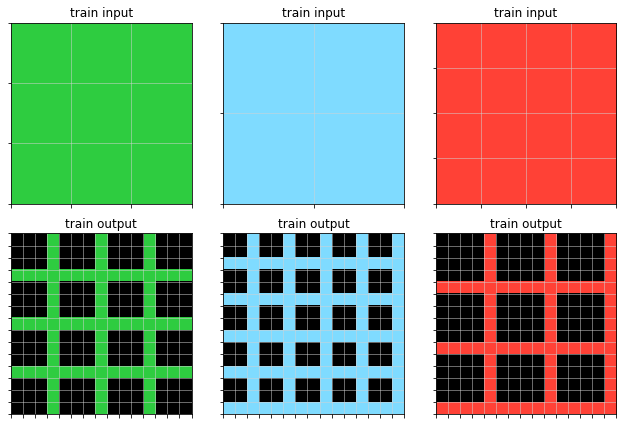

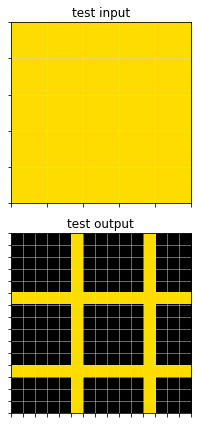

6f473927.json


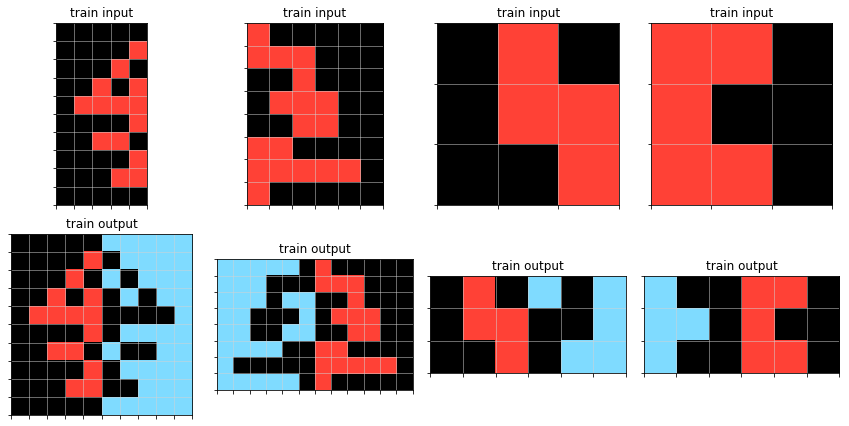

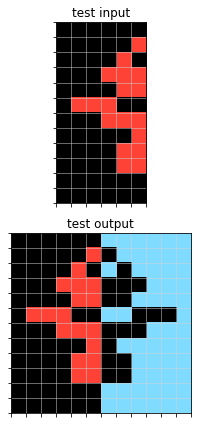

7039b2d7.json


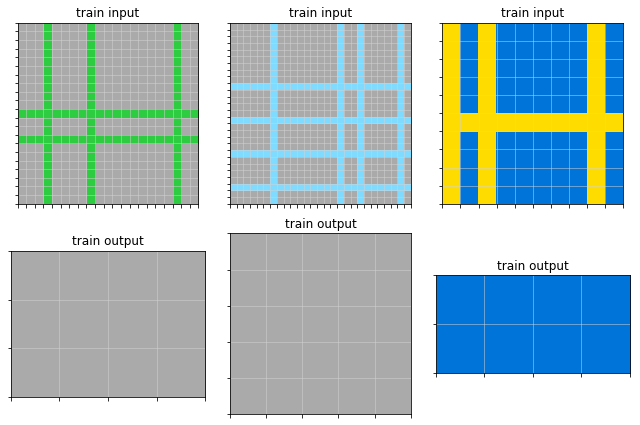

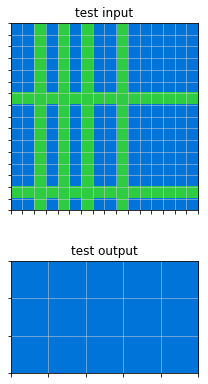

73ccf9c2.json


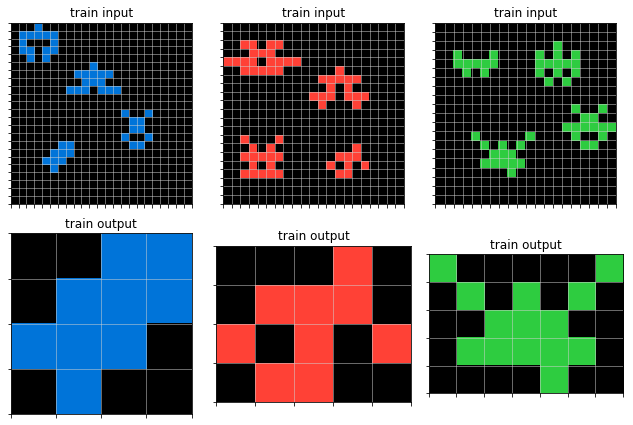

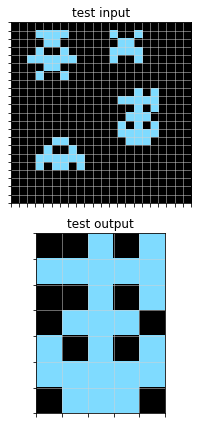

7953d61e.json


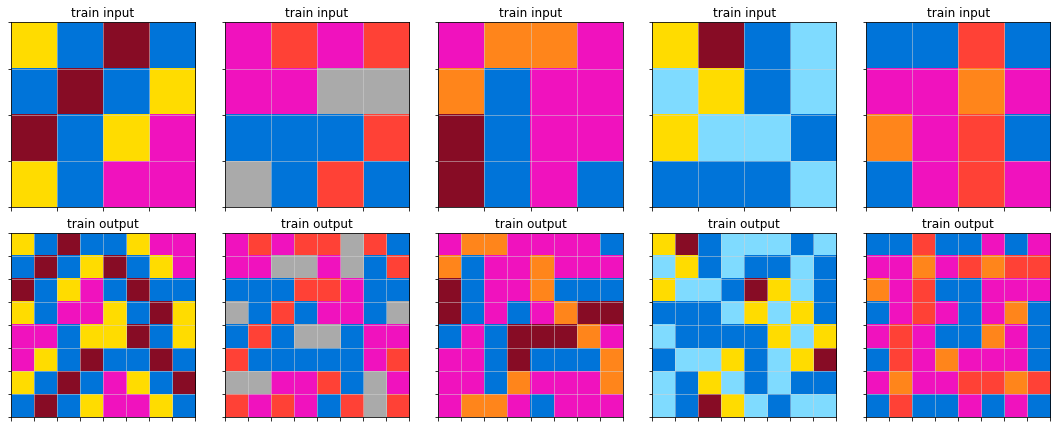

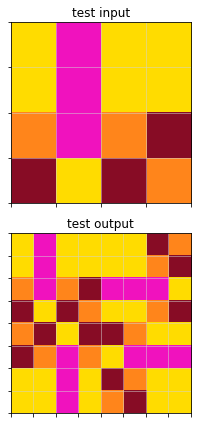

7bb29440.json


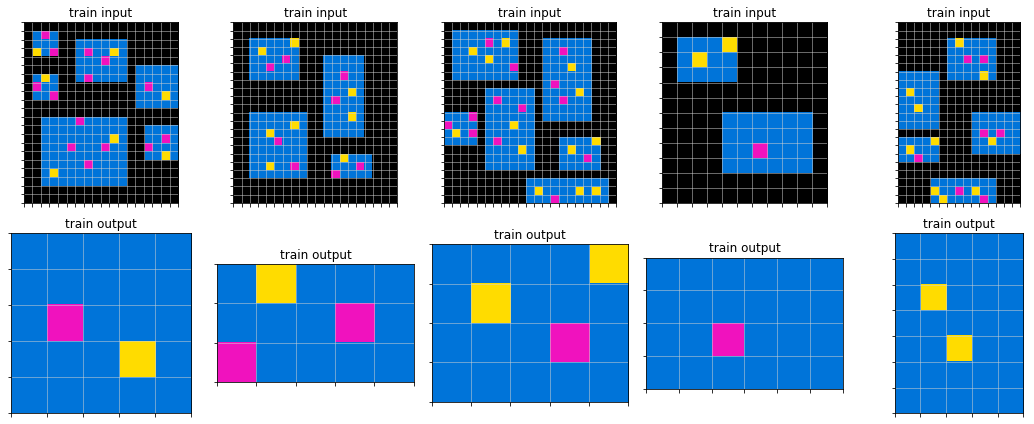

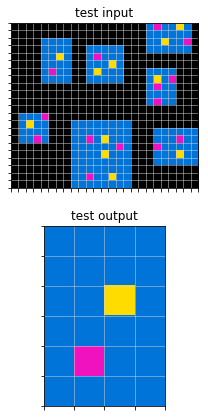

7c9b52a0.json


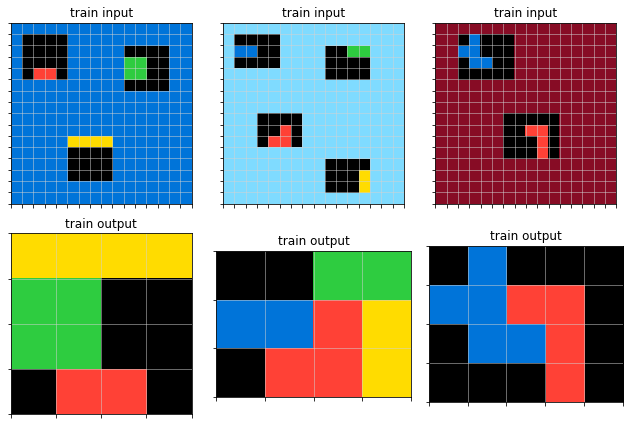

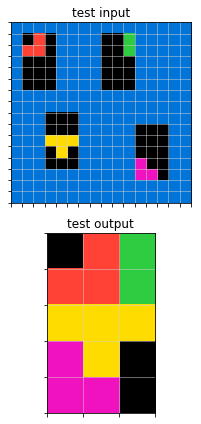

81c0276b.json


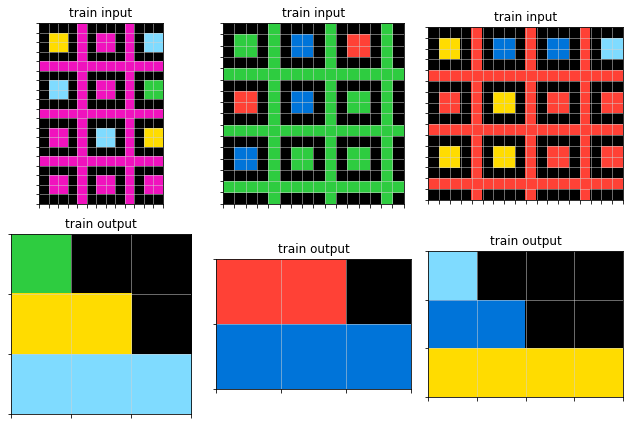

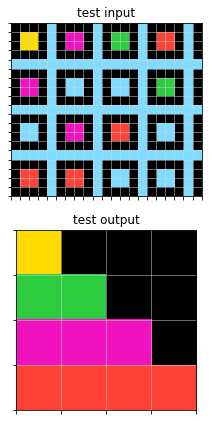

833dafe3.json


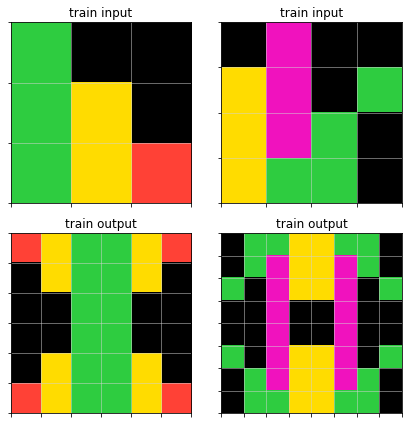

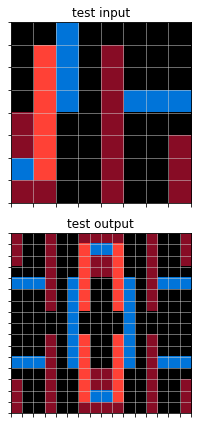

8719f442.json


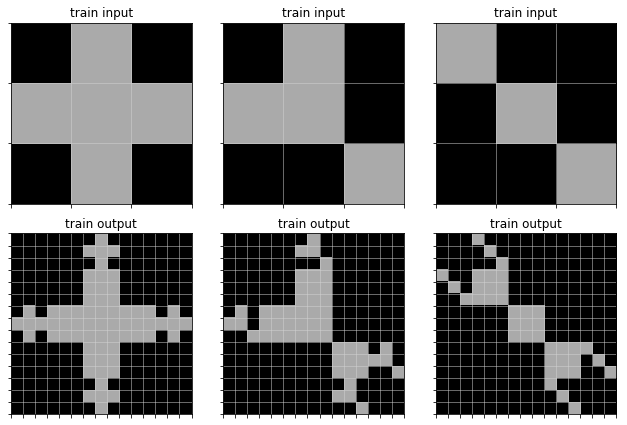

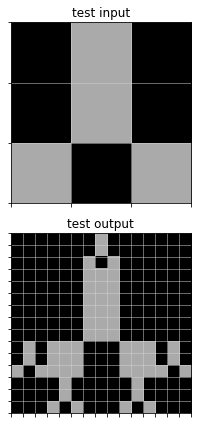

8b28cd80.json


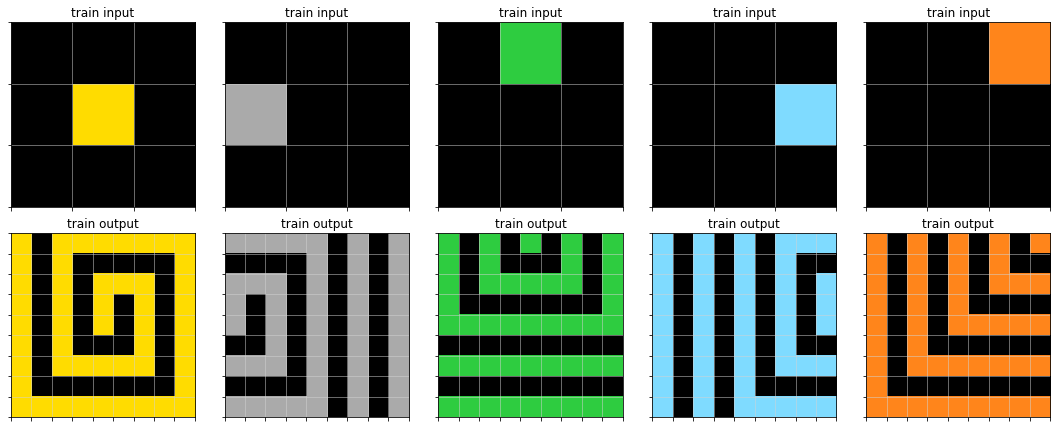

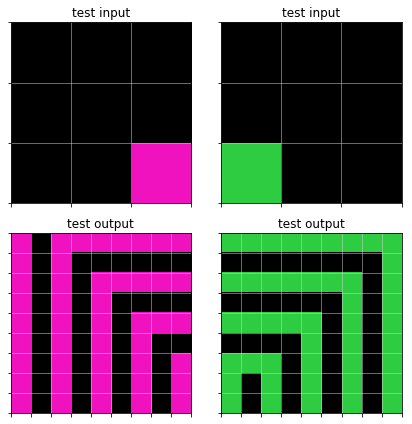

8e2edd66.json


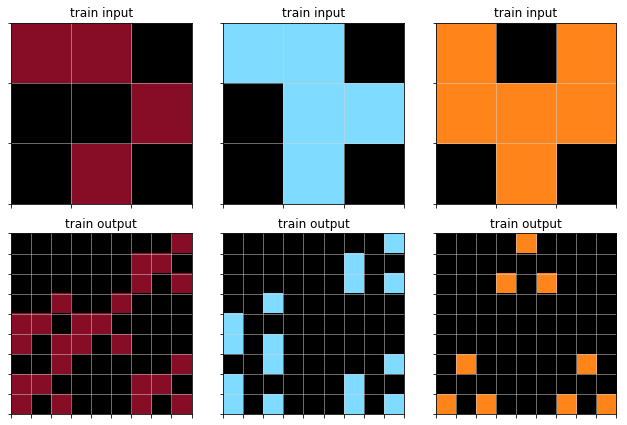

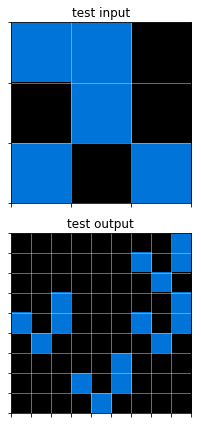

93b4f4b3.json


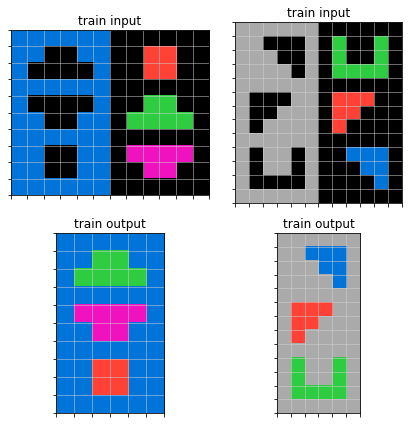

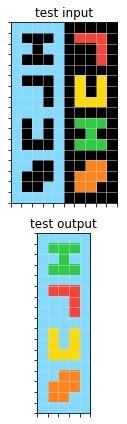

94133066.json


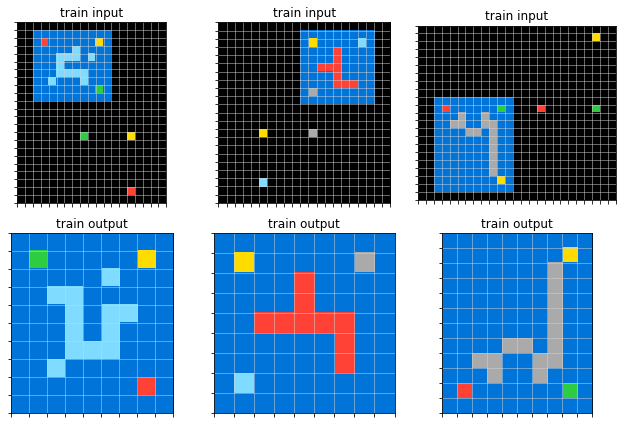

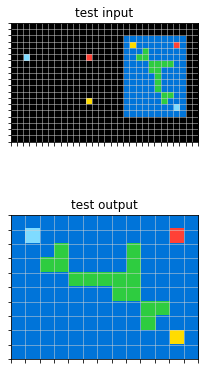

a59b95c0.json


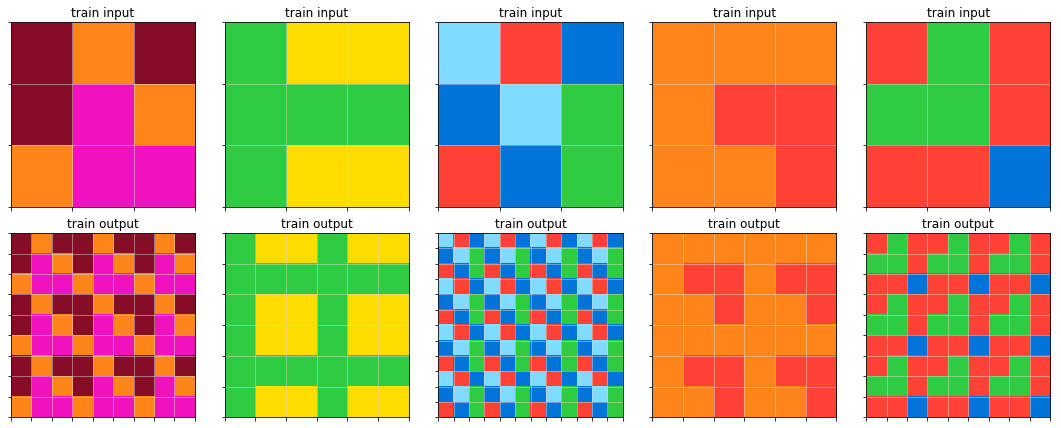

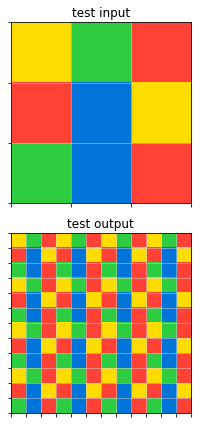

a680ac02.json


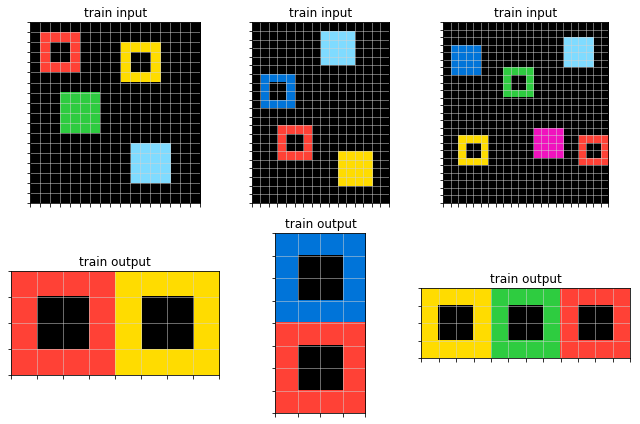

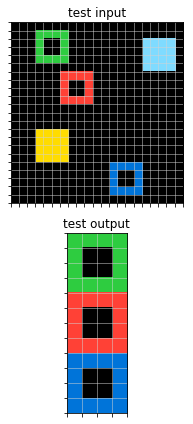

aab50785.json


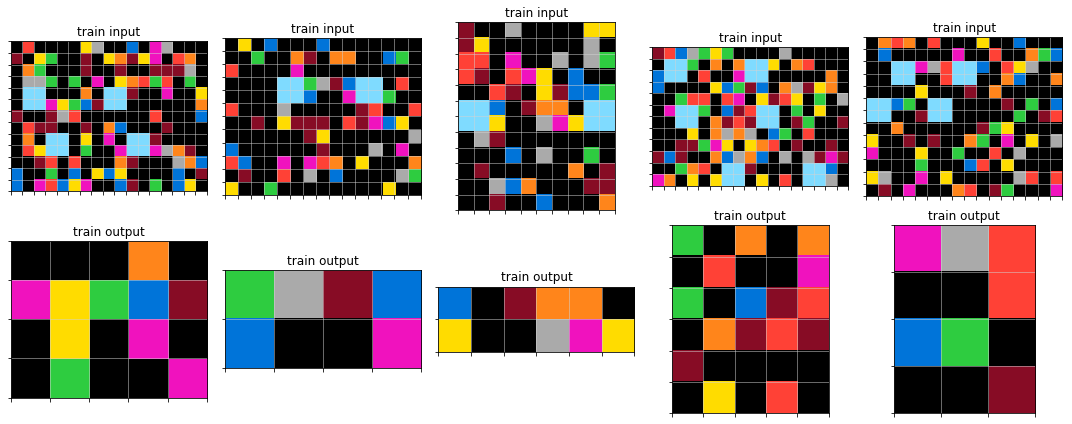

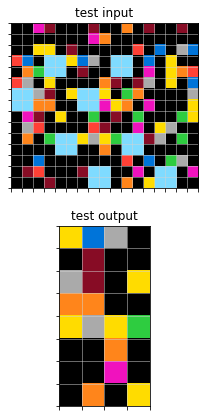

ad7e01d0.json


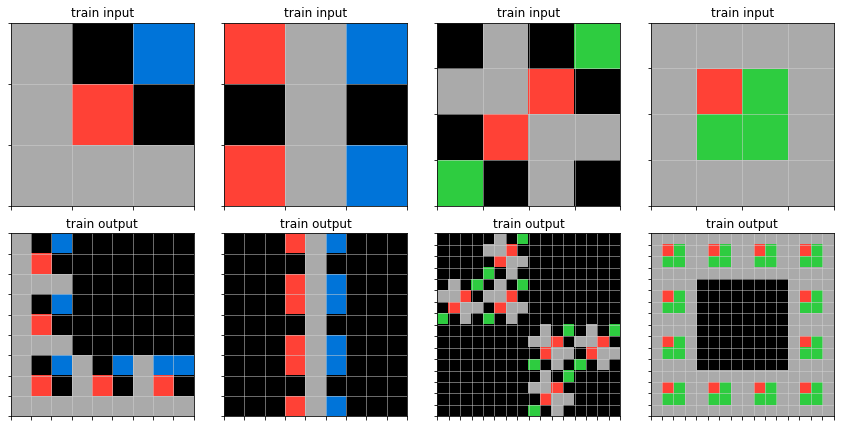

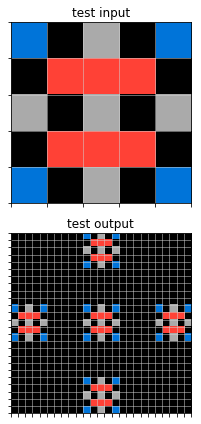

aee291af.json


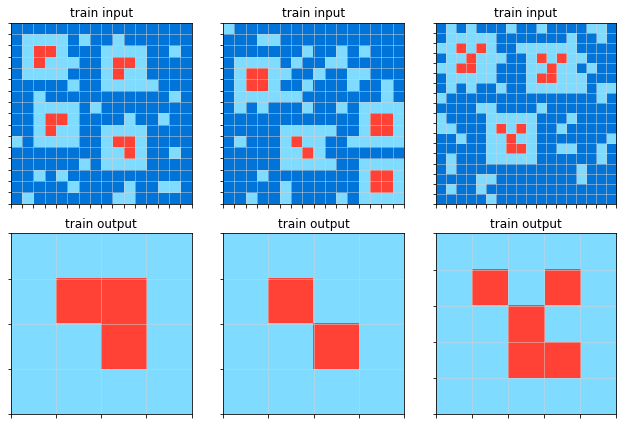

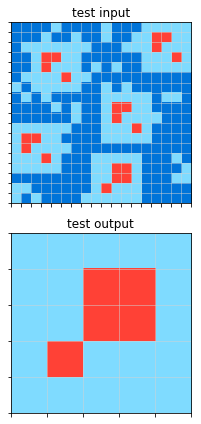

b0722778.json


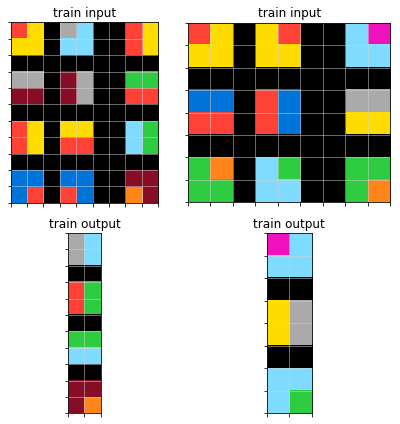

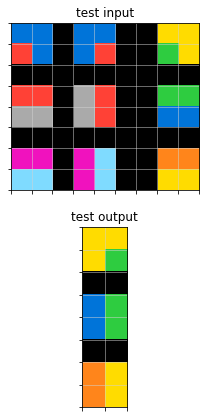

b0f4d537.json


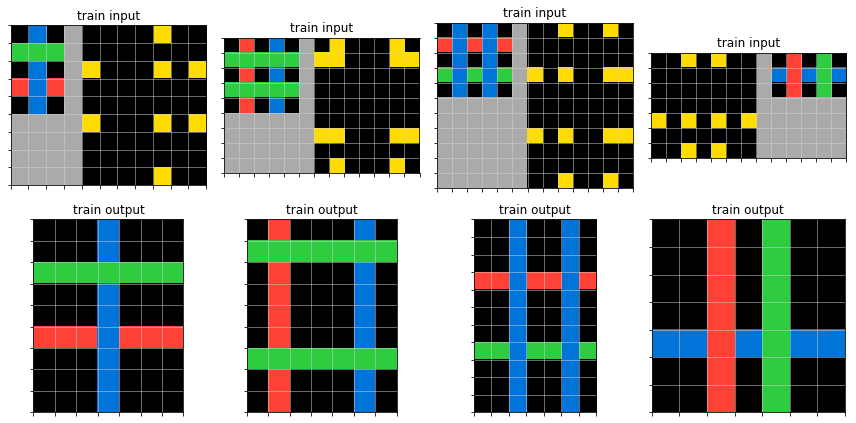

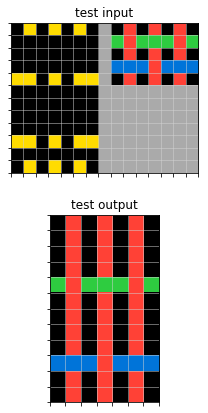

b4a43f3b.json


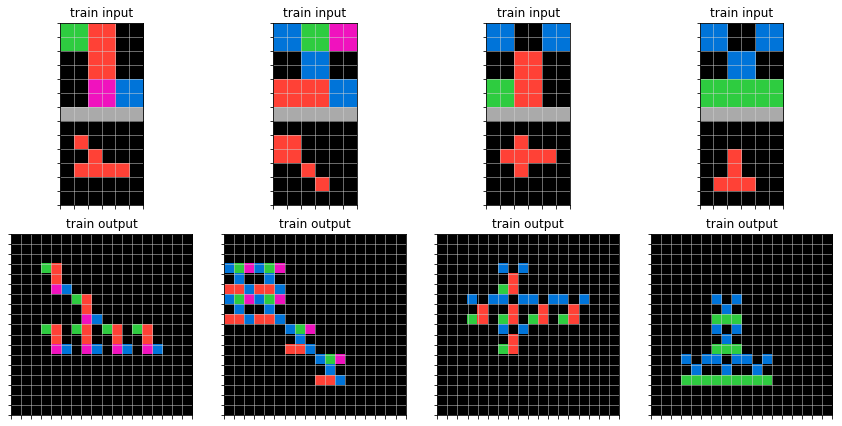

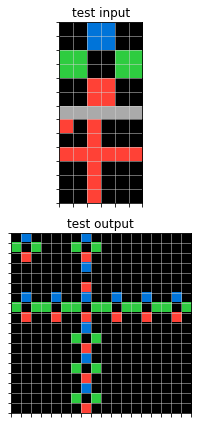

b7999b51.json


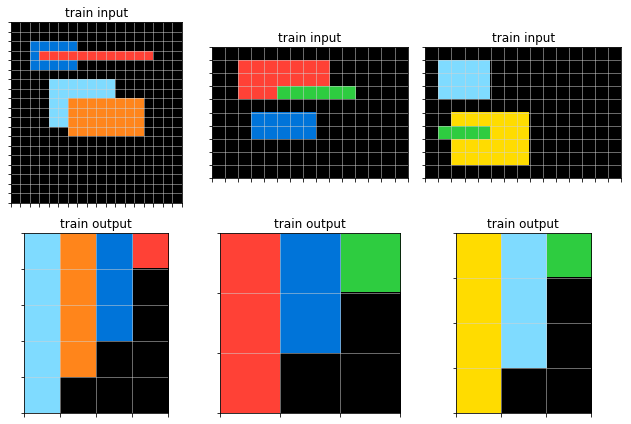

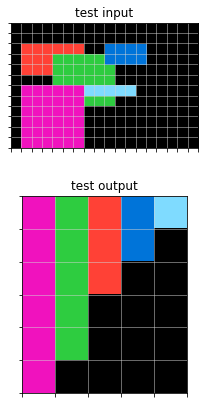

bc4146bd.json


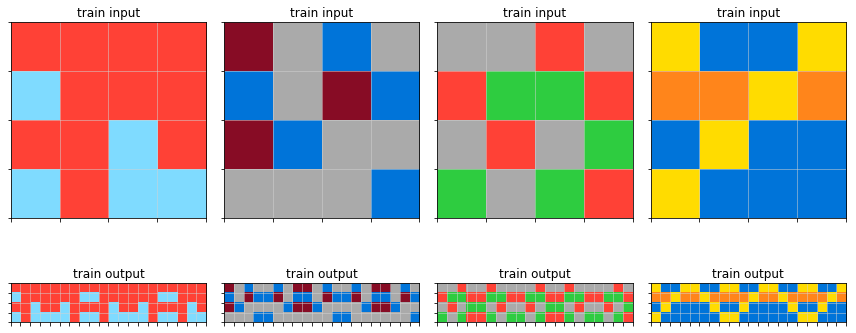

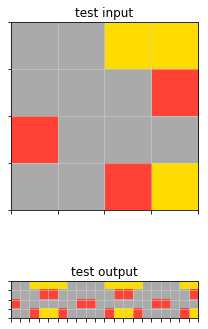

c1990cce.json


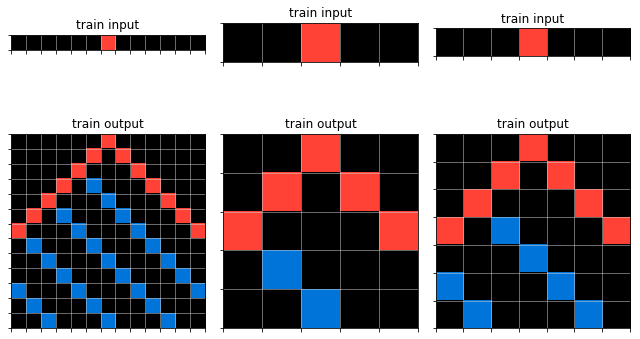

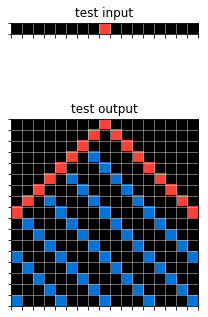

c3202e5a.json


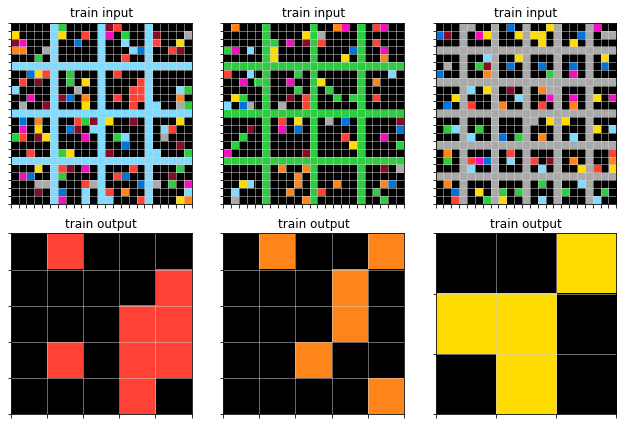

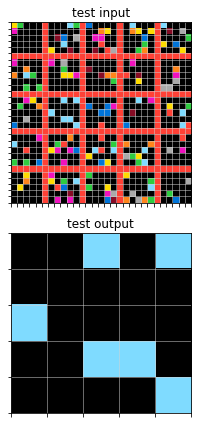

c48954c1.json


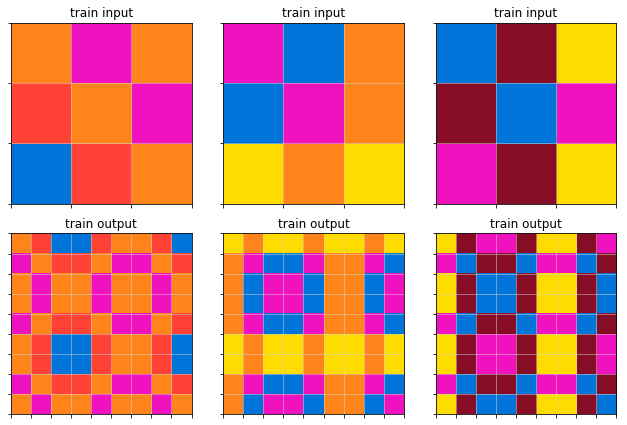

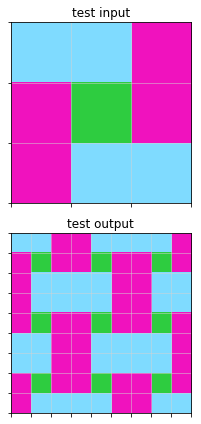

c64f1187.json


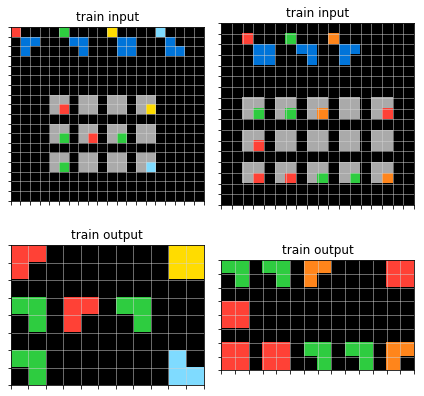

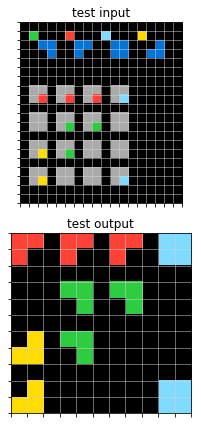

c658a4bd.json


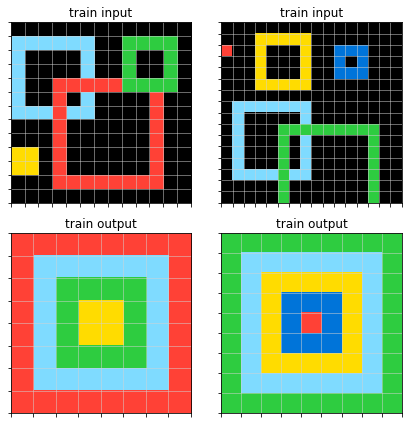

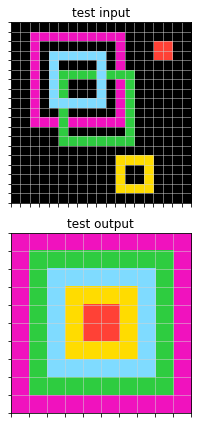

c92b942c.json


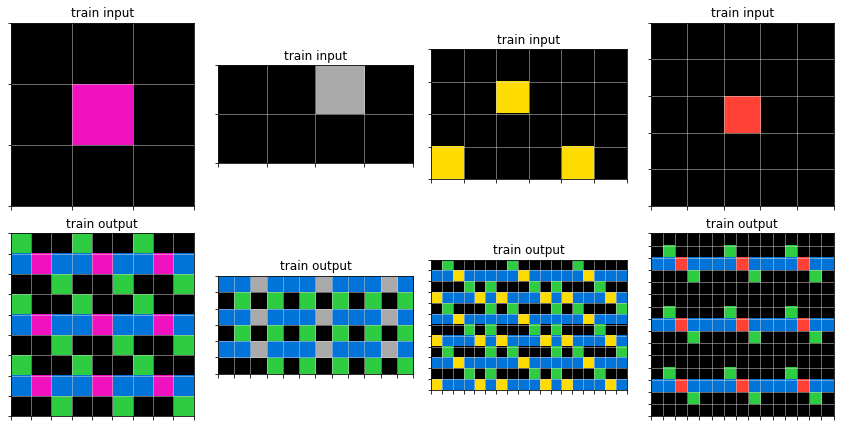

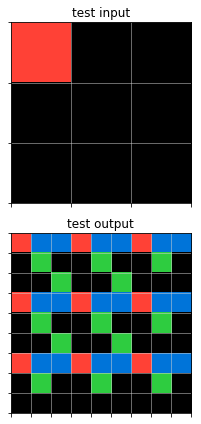

cad67732.json


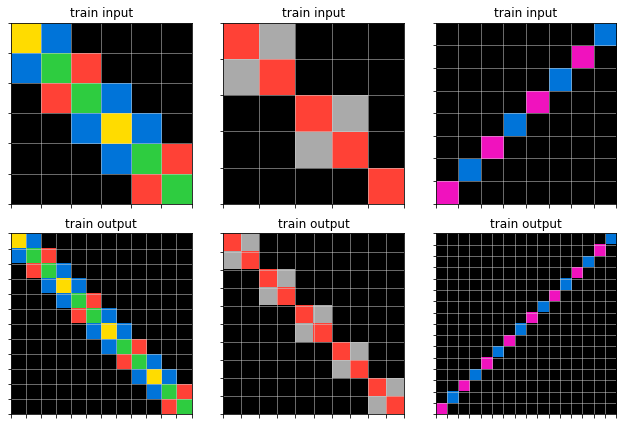

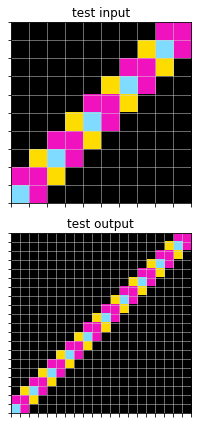

ccd554ac.json


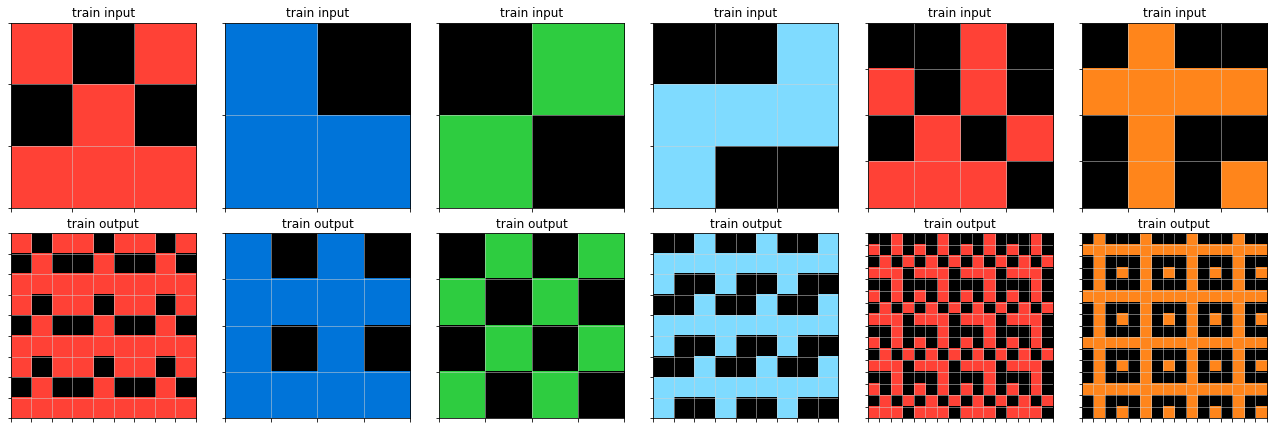

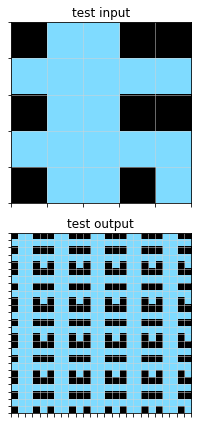

cd3c21df.json


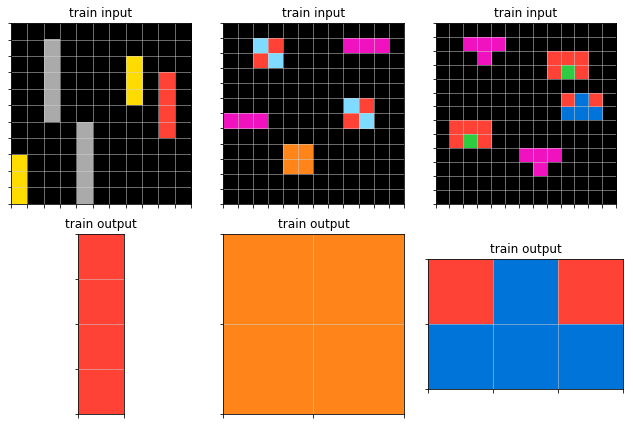

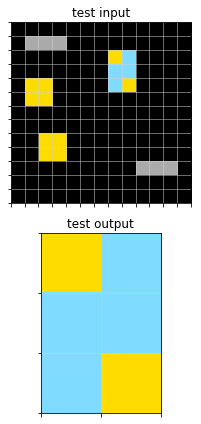

ce8d95cc.json


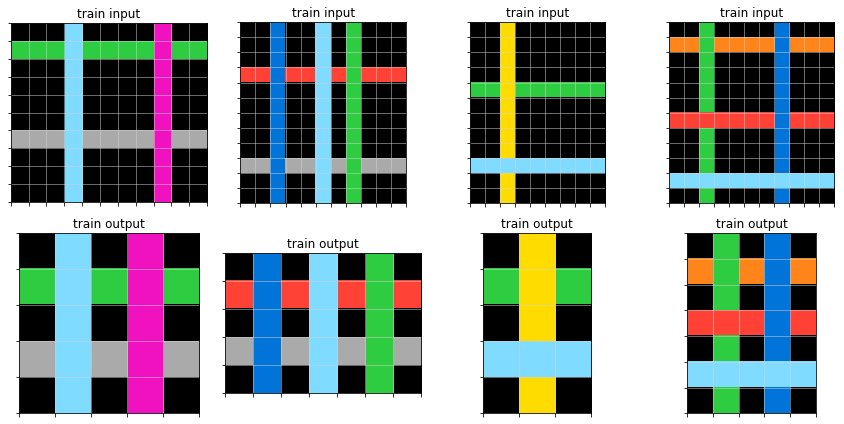

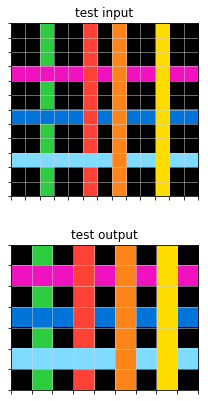

d017b73f.json


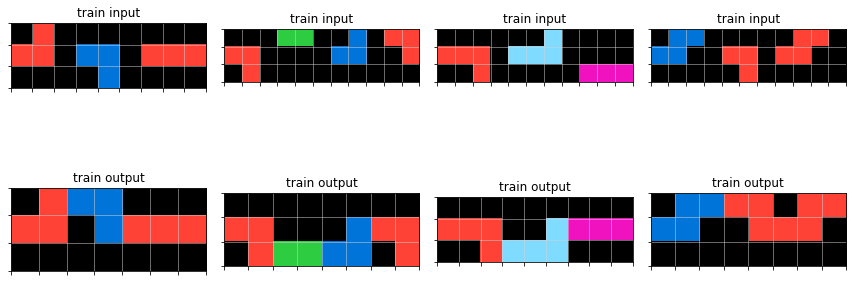

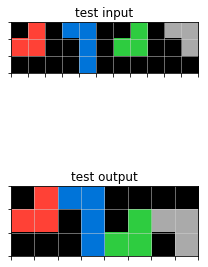

d4b1c2b1.json


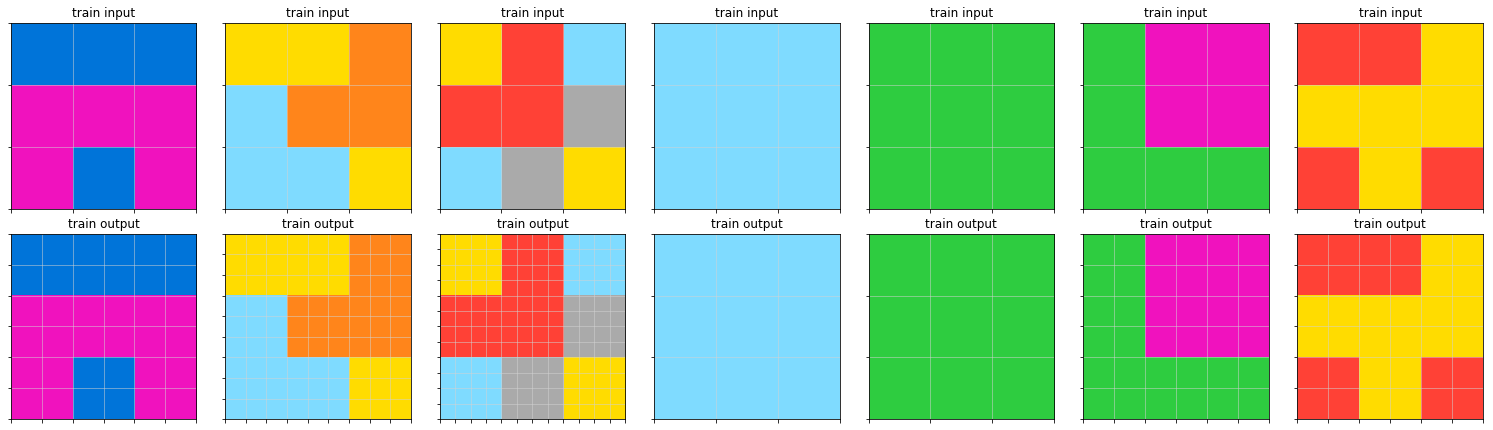

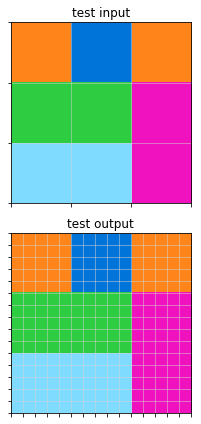

d4c90558.json


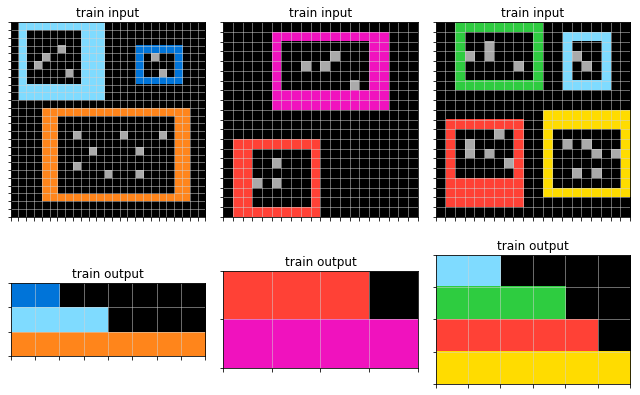

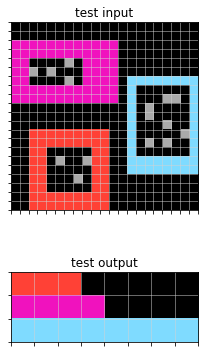

d56f2372.json


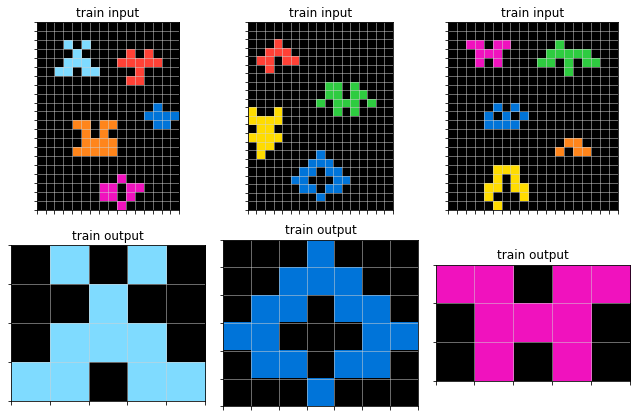

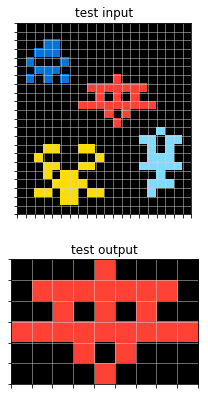

d5c634a2.json


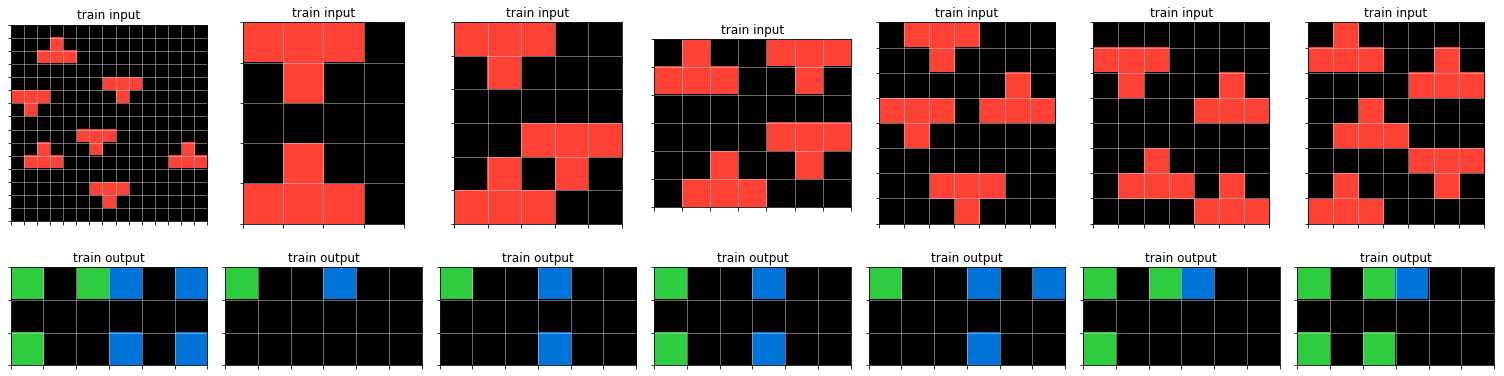

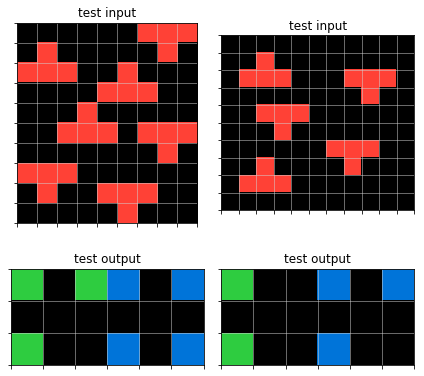

de493100.json


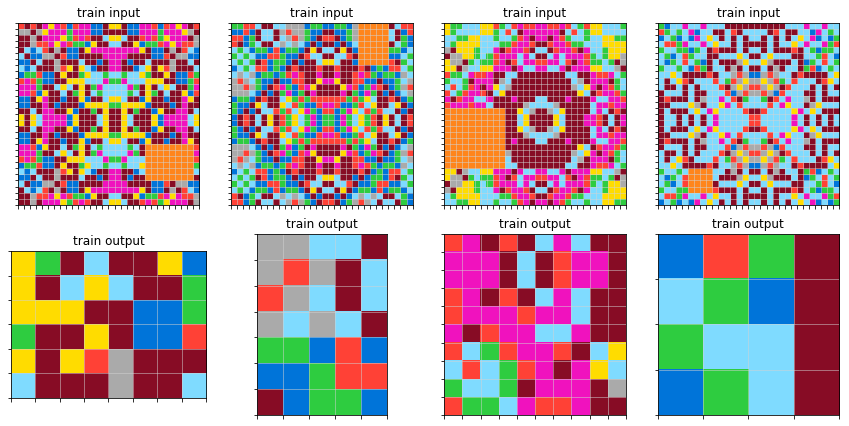

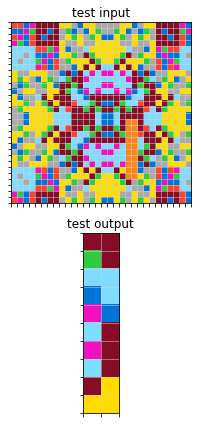

e1baa8a4.json


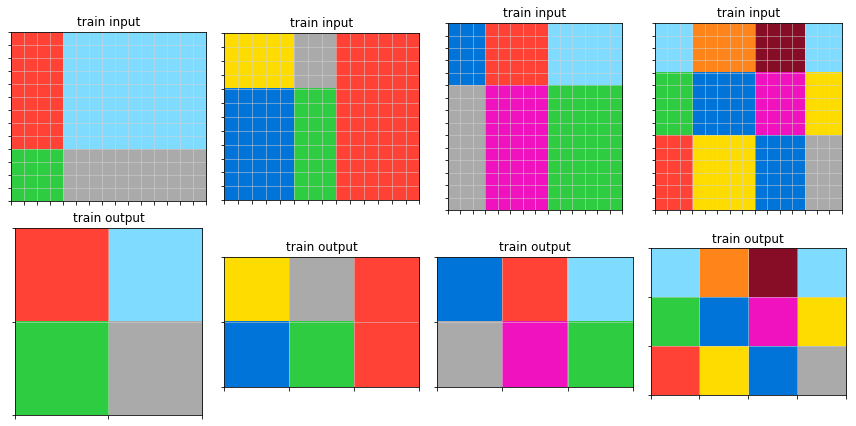

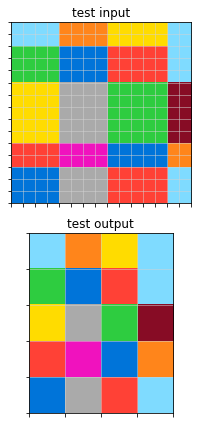

e633a9e5.json


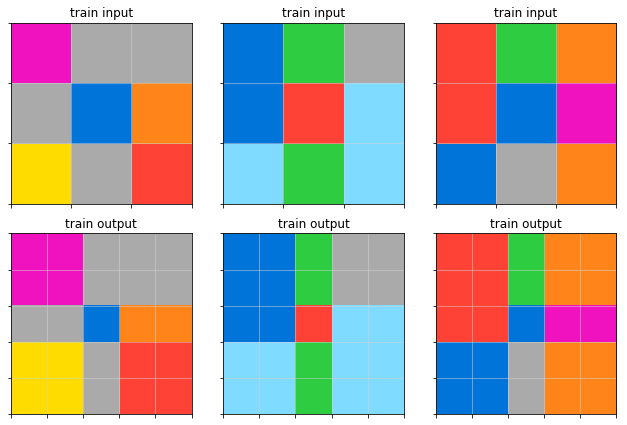

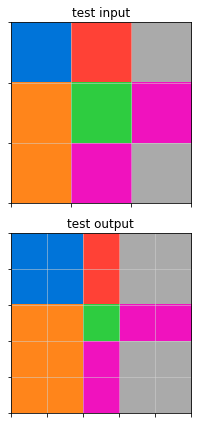

e66aafb8.json


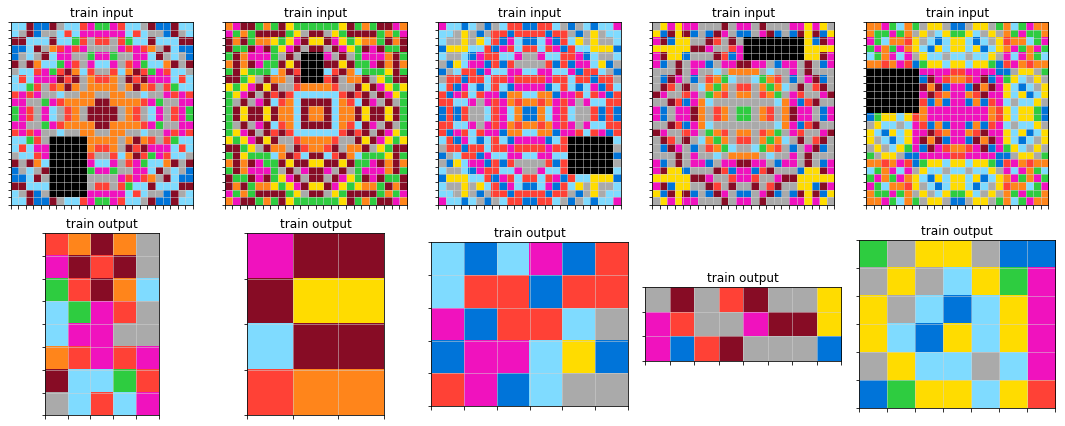

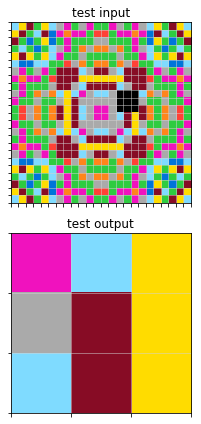

e6de6e8f.json


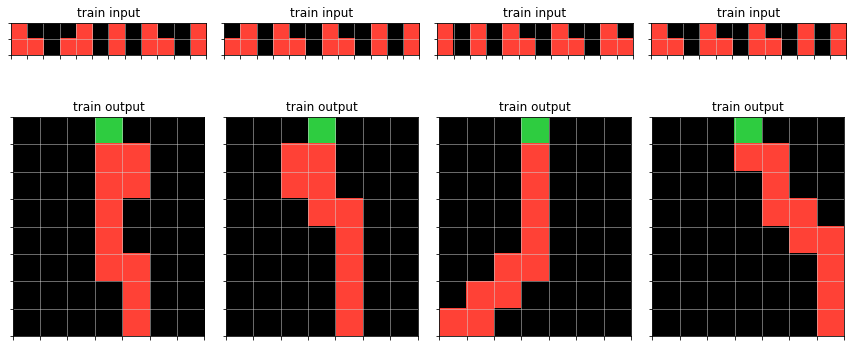

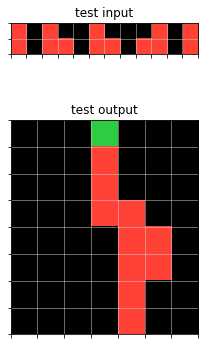

e78887d1.json


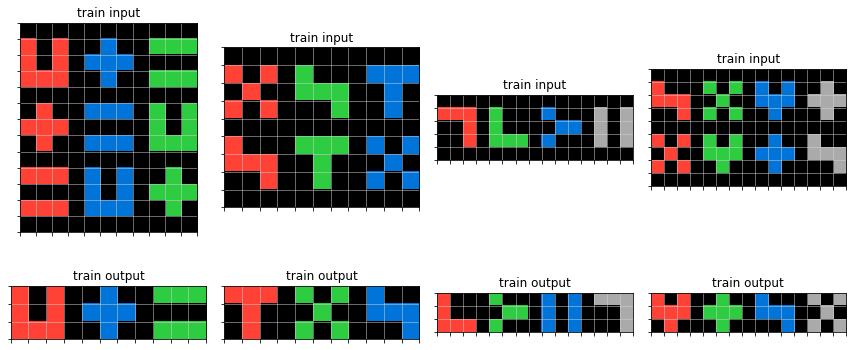

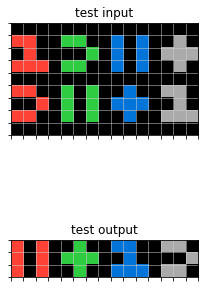

e7a25a18.json


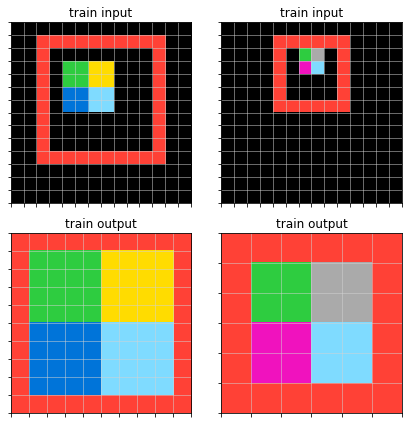

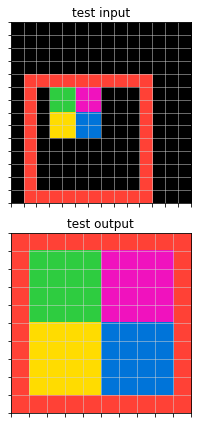

e872b94a.json


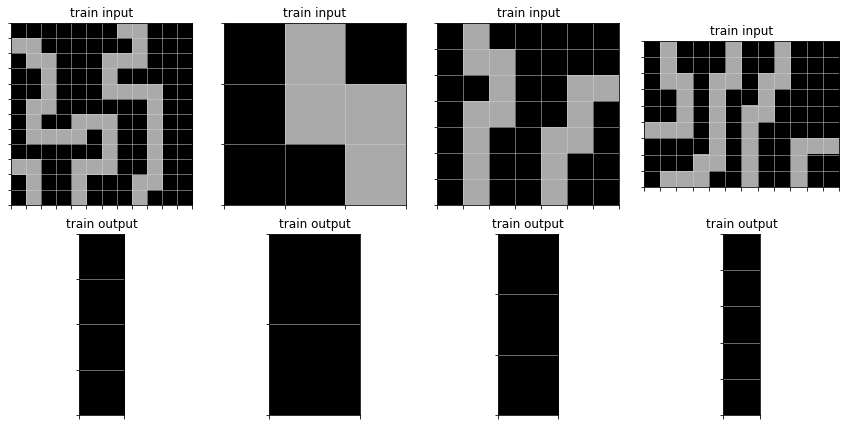

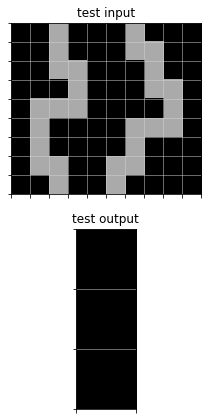

e9b4f6fc.json


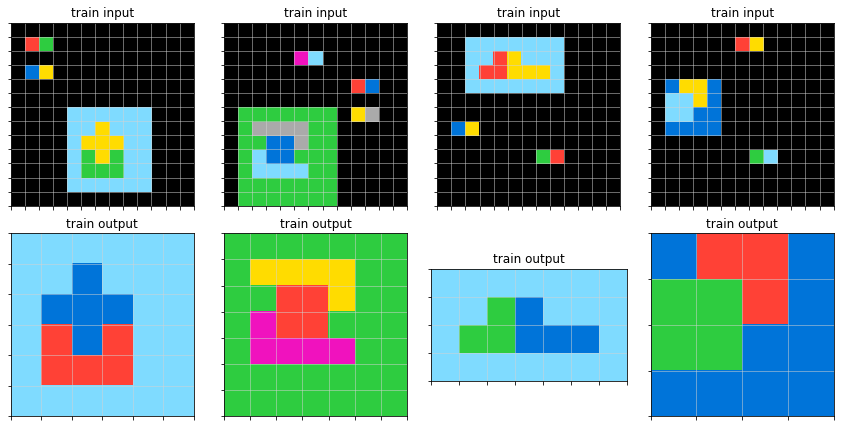

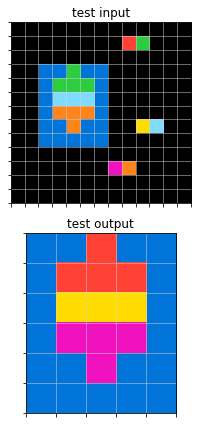

ed98d772.json


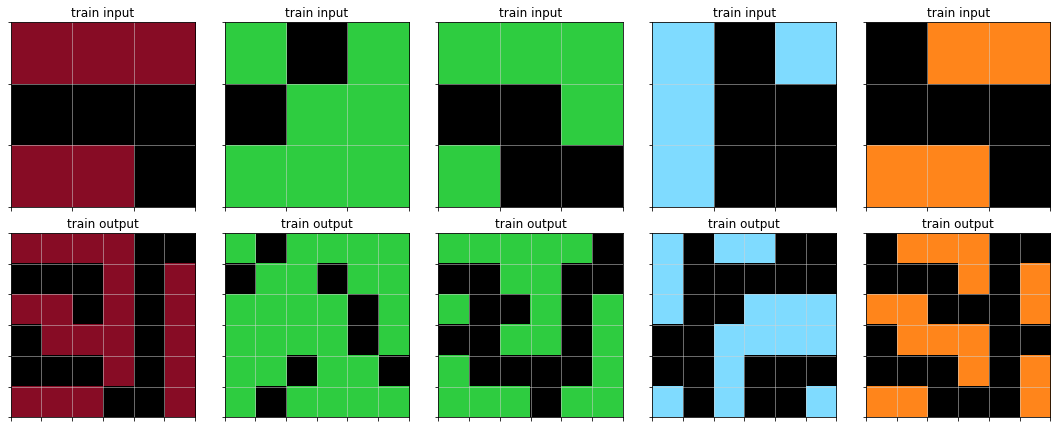

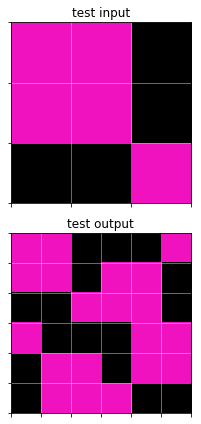

f0afb749.json


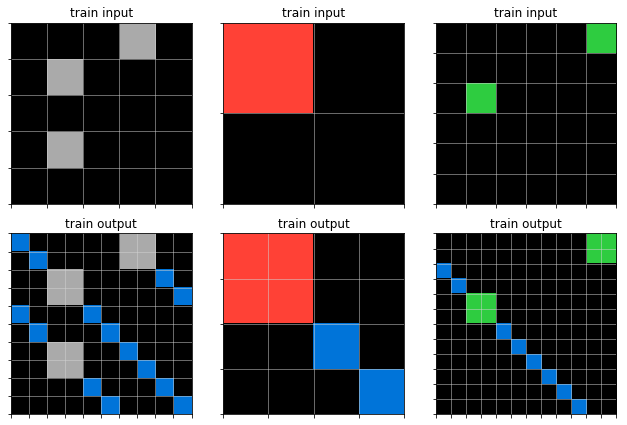

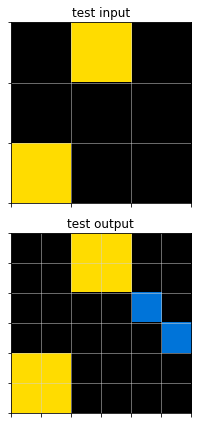

f4081712.json


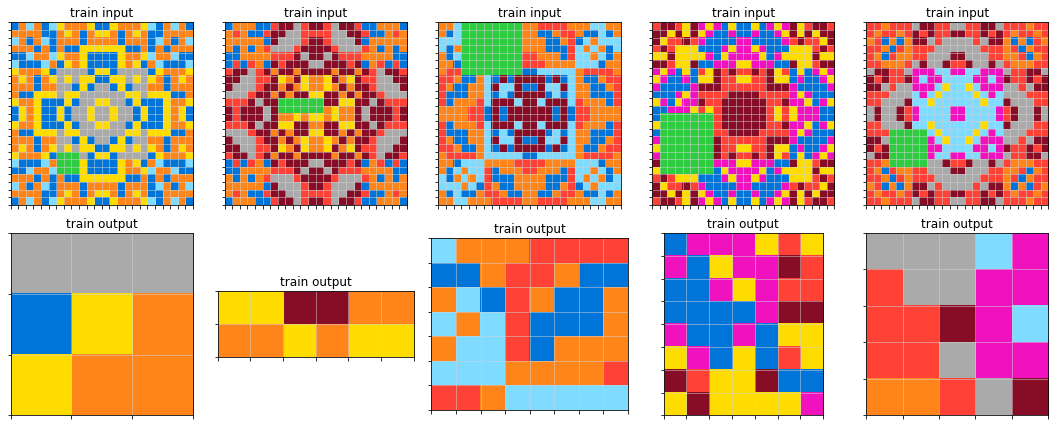

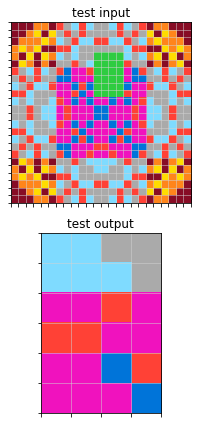

f5aa3634.json


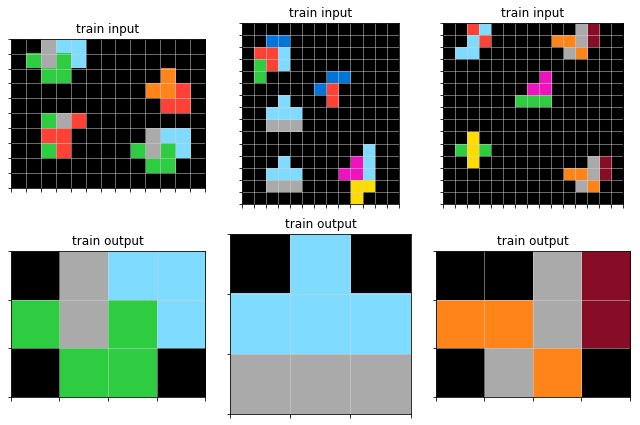

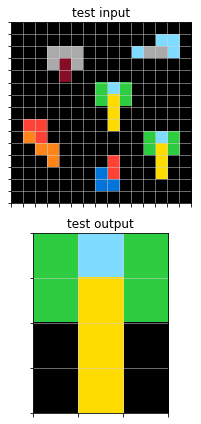

fb791726.json


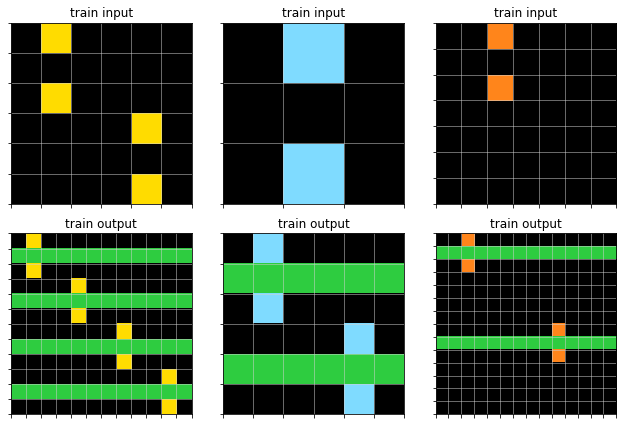

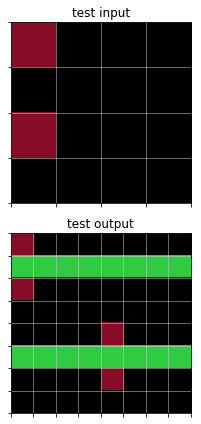

84, 21.0%
21, 21.0%


In [30]:
tmp = training_descriptive_df[training_descriptive_df["class"]>=10]
tmp = tmp[tmp["class"] <= 13]

#for i in tmp["task_name"]:
#    print(i)
#    task = get_data(str(training_path / i))
#    plot_task(task)
        
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / training_descriptive_df.shape[0])+"%")
tmp = evaluation_descriptive_df[evaluation_descriptive_df["class"]>=10]
tmp = tmp[tmp["class"] <= 13]

tmp0_eval = tmp.copy()
for i in tmp["task_name"]:
    print(i)
    task = get_data(str(evaluation_path / i))
    plot_task(task)
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / evaluation_descriptive_df.shape[0])+"%")

tmp = test_descriptive_df[test_descriptive_df["class"]>=10]
tmp = tmp[tmp["class"] <= 13]

tmp0_test = tmp.copy()
print(str(tmp.shape[0])+str(", ")+str(tmp.shape[0] * 100 / test_descriptive_df.shape[0])+"%")